# **Sentiment Analysis using the BERT-Model for Amazon Reviews (electronics)**

## Installing the libraries we will need to conduct the sentiment analysis

## Importing Necessary libraries

#### Important to note that the beautifulsoup library is only need if we want to scrape data off a website directly rather than using an existing table or dataset. 

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import torch
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from tqdm import tqdm
from scipy.special import softmax
from sklearn.metrics import accuracy_score, average_precision_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_recall_fscore_support, confusion_matrix
from scipy.stats import ttest_rel

### Decision to remove BERT from the Project was due to project specific reasons and time contsraints; the code to perform sentiment analysis using the BERT model is below.

## Setting up the BERT and Transformers Nueral Network

In [124]:
# tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

## Converting the data from the csv file into a DataFrame

In [125]:
# file = r"C:\Users\P-DTC1\Downloads\Amazon Product Review Data.csv"
# df = pd.read_csv(file)
# df

#### We want to isolate 'Review Body' from our dataframe as this is what we will be conducting our sentiment analysis on but also to look at the reviews as well. 

In [126]:
# df['Review Body']

#### The code below converts all of the entries into strings and repalces any values with 'NaN' into an empty string. 

In [127]:
# df['Review Body'] = df['Review Body'].astype(str).fillna('')
#df

,Manual Rater 1 Sentiment,VADER Sentiment,RoBERTa Sentiment
0,1,1.0,1.0
1,0,0.0,0.0
2,1,1.0,1.0
3,1,1.0,1.0
4,1,1.0,1.0
...,...,...,...
462,1,1.0,1.0
463,0,1.0,1.0
464,0,1.0,1.0
465,1,1.0,1.0


## Calculating the Sentiment of Amazon Reviews

#### PyTorch converts its sentiment scores into 5 different ratings with the left most value considered the worst and right most value considered the best and the middle value being neutral. By using 'torch.argmax' it selects the largest out of the 5 values and converts it into a value between 0 and 4. For contextual reasons, working with reviews and star ratings, we '+ 1' to our result and convert it to an integer, that way, our result will either be '1, 2, 3, 4 or 5' and nothing else in between. Although, converting the scores into an integer reduces accuracy of the sentiment level, it allows for us to conduct am appropriate and effective comparison against star reviews chosen by customers (manually) and also against other LLM's/Ai. 

In [128]:
# def sentiment_score(review_body):
#     tokens = tokenizer.encode(review_body, return_tensors='pt')
#     result = model(tokens)
#     return int(torch.argmax(result.logits))+1

In [129]:
# df['BERT Rating'] = df['Review Body'].apply(lambda x: sentiment_score(x[:512]))

## Original table combined with the sentiment score

In [130]:
# df

In [131]:
# def classify_bert_sentiment(review_rating):
#     if review_rating >= 4:
#         return 'Positive'
#     elif review_rating == 3:
#         return 'Neutral'
#     else:
#         return 'Negative'

# df['bert_sentiment'] = df['BERT Rating'].apply(classify_bert_sentiment)

# df


In [132]:
#import pandas as pd
#import torch
#from transformers import BertTokenizer, BertForSequenceClassification
#from transformers import pipeline

# Load the data
#file = r"C:\Users\P-DTC1\Downloads\Amazon Product Review Data.csv"
#df = pd.read_csv(file, encoding='ISO-8859-1')

#df['Review Body'].fillna('', inplace=True)

# Load pre-trained BERT model and tokenizer for sentiment analysis
#model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
#tokenizer = BertTokenizer.from_pretrained(model_name)
#model = BertForSequenceClassification.from_pretrained(model_name)

#MAX_LEN = 512

# Function to truncate reviews
#def truncate_review(review, max_len):
    #tokens = tokenizer.tokenize(review)
    #if len(tokens) > max_len:
        #tokens = tokens[:max_len]
    #return tokenizer.convert_tokens_to_string(tokens)

# Truncate reviews to the maximum sequence length
#df['Truncated Review'] = df['Review Body'].apply(lambda x: truncate_review(x, MAX_LEN))

# Initialize sentiment analysis pipeline with truncation
#nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, max_length=MAX_LEN, truncation=True)

# Perform sentiment analysis on truncated review bodies
#sentiments = nlp(df['Truncated Review'].tolist())

# Extract sentiment scores and labels
#df['BERT Sentiment'] = [sent['label'] for sent in sentiments]
#df['BERT Confidence Score'] = [sent['score'] for sent in sentiments]

# Display the dataframe with sentiment results
#df


In [133]:
# bert_rating_counts = df['BERT Rating'].value_counts().sort_index()

# actual_rating_counts = df['Review Rating'].value_counts().sort_index()

# labels = bert_rating_counts.index
# width = 0.35

# fig, ax = plt.subplots(figsize=(10, 6))

# ax.bar(labels - width/2, bert_rating_counts, width, label='BERT Ratings', color='blue')
# ax.bar(labels + width/2, actual_rating_counts, width, label='Actual Review Ratings', color='green')

# ax.set_xlabel('Star Rating')
# ax.set_ylabel('Count')
# ax.set_title('Distribution of BERT Ratings vs Actual Review Ratings')
# ax.set_xticks(labels)
# ax.set_xticklabels(labels)
# ax.legend()

# plt.show()

### Experimental section - Identifying errors in sentiment by looking at specific reviews and comparing the sentiment score to the review rating and more...

In [134]:
# df['Review Body'].iloc[46]

In [135]:
# df.iloc[46]

## VADERS for Sentiment Analysis

In [3]:
file = r"C:\Users\P-DTC1\Downloads\Amazon Product Review Data.csv"
df = pd.read_csv(file)
df

,ID,Review Title,Review Rating,Review Body
0,1,Absolutely fantastic,5,"I'm in love with these headphones, I couldn't ..."
1,2,"awful, avoid (HESH ANC)",1,i bought these after seeing good reviews howev...
2,3,great,5,great
3,4,Great product,5,Excellent
4,5,Great sound,5,My son bought these even though he has air pod...
...,...,...,...,...
504,505,Dim and low res,1,854x480 is frankly ridiculous in 2024. This th...
505,506,Personal projector,5,If you don't want to sleep on the couch while ...
506,507,Amazing little device that delivers all promised,5,Well built little can that with the added aid ...
507,508,Great Projector,5,Love the easy use and robust construction. Gre...


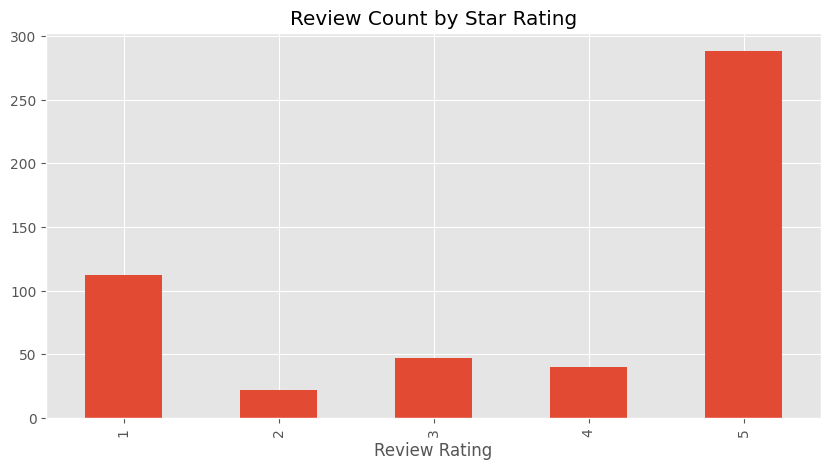

In [4]:
ax = df['Review Rating'].value_counts().sort_index().plot(kind='bar', title='Review Count by Star Rating', 
                                                          figsize=(10, 5))

#### Understanding how nltk is interpreting the words

In [5]:
example = df['Review Body'][50]
print(example)

Please be careful when buying this product from Amazon, the sellers are sending out a Chinese import of the product. Although the product does work as intended, the warranty offered by Nintendo is not valid here in the U.K, and the sellers are not clearing stating that the products they are sending are Chinese imports. Quite disappointed because of this.


In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from tqdm import tqdm
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\P-DTC1\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
sia = SentimentIntensityAnalyzer()

In [ ]:
sia = SentimentIntensityAnalyzer()
example = 'This is absolutely amazing!'
sia.polarity_scores('This is absolutely amazing!')
sia.polarity_scores(example)

In [12]:
sia.polarity_scores('This is absolutely amazing!')

{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6581}

In [13]:
sia.polarity_scores('This is absolutely awful!')

{'neg': 0.544, 'neu': 0.456, 'pos': 0.0, 'compound': -0.5551}

In [14]:
sia.polarity_scores(example)

{'neg': 0.053, 'neu': 0.859, 'pos': 0.088, 'compound': 0.0534}

In [15]:
df['Review Body'] = df['Review Body'].fillna('').astype(str)

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    review_body = row['Review Body']
    myid = row['ID']
    res[myid] = sia.polarity_scores(review_body)

res

100%|██████████| 509/509 [00:00<00:00, 2420.49it/s]


{1: {'neg': 0.051, 'neu': 0.575, 'pos': 0.374, 'compound': 0.9795},
 2: {'neg': 0.187, 'neu': 0.771, 'pos': 0.042, 'compound': -0.8396},
 3: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6249},
 4: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5719},
 5: {'neg': 0.0, 'neu': 0.837, 'pos': 0.163, 'compound': 0.6249},
 6: {'neg': 0.0, 'neu': 0.83, 'pos': 0.17, 'compound': 0.5719},
 7: {'neg': 0.196, 'neu': 0.676, 'pos': 0.128, 'compound': -0.5023},
 8: {'neg': 0.098, 'neu': 0.383, 'pos': 0.519, 'compound': 0.8271},
 9: {'neg': 0.102, 'neu': 0.691, 'pos': 0.208, 'compound': 0.7839},
 10: {'neg': 0.239, 'neu': 0.615, 'pos': 0.146, 'compound': -0.6458},
 11: {'neg': 0.051, 'neu': 0.575, 'pos': 0.374, 'compound': 0.9795},
 12: {'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249},
 13: {'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'compound': 0.8256},
 14: {'neg': 0.0, 'neu': 0.903, 'pos': 0.097, 'compound': 0.3919},
 15: {'neg': 0.058, 'neu': 0.911, 'pos': 0.03, 'compound': -0.29

In [16]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'ID'})
vaders = vaders.merge(df, how='left')

In [17]:
vaders.head()

,ID,neg,neu,pos,compound,Review Title,Review Rating,Review Body
0,1,0.051,0.575,0.374,0.9795,Absolutely fantastic,5,"I'm in love with these headphones, I couldn't ..."
1,2,0.187,0.771,0.042,-0.8396,"awful, avoid (HESH ANC)",1,i bought these after seeing good reviews howev...
2,3,0.000,0.000,1.000,0.6249,great,5,great
3,4,0.000,0.000,1.000,0.5719,Great product,5,Excellent
4,5,0.000,0.837,0.163,0.6249,Great sound,5,My son bought these even though he has air pod...


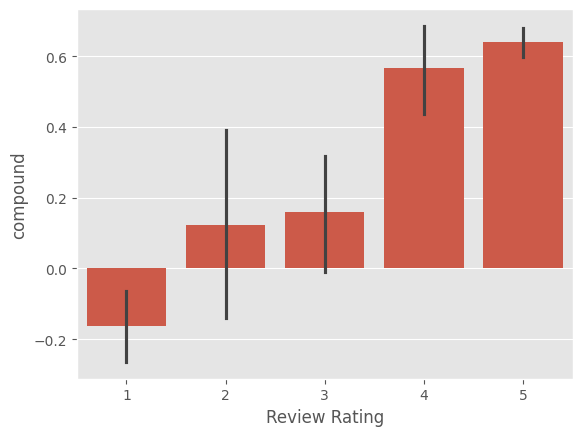

In [18]:
sns.barplot(data=vaders, x='Review Rating', y='compound')
ax.set_title('Compound Scorea Against Amazon Star Reviews')
plt.show()

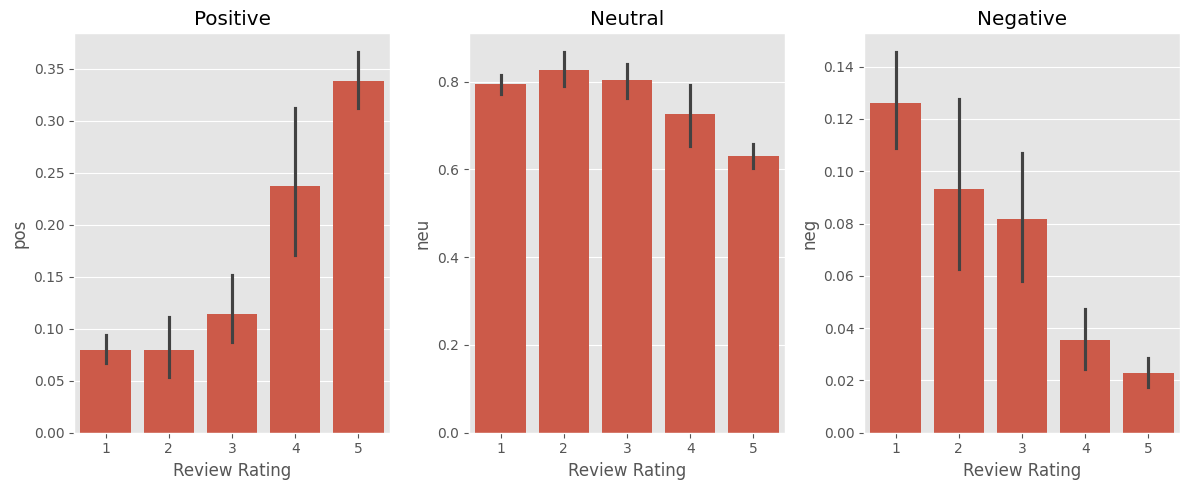

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(12,5))
sns.barplot(data=vaders, x='Review Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Review Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Review Rating', y='neg', ax=axs[2])

axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## ROBERTA for Sentiment Analysis

In [3]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [153]:
print(example)
sia.polarity_scores(example)

Please be careful when buying this product from Amazon, the sellers are sending out a Chinese import of the product. Although the product does work as intended, the warranty offered by Nintendo is not valid here in the U.K, and the sellers are not clearing stating that the products they are sending are Chinese imports. Quite disappointed because of this.


{'neg': 0.053, 'neu': 0.859, 'pos': 0.088, 'compound': 0.0534}

In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg':scores[0],
        'roberta_neu':scores[1],
        'roberta_pos':scores[2]
    }
    return scores_dict


In [155]:
def calculate_roberta_compound(scores):
    # Using weights: positive=1, neutral=0, negative=-1
    weights = {'roberta_neg': -1, 'roberta_neu': 0, 'roberta_pos': 1}
    compound_score = (weights['roberta_neg'] * scores['roberta_neg'] +
                      weights['roberta_neu'] * scores['roberta_neu'] +
                      weights['roberta_pos'] * scores['roberta_pos'])
    return compound_score


In [156]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        review_body = row['Review Body']
        myid = row['ID']
        vader_result = sia.polarity_scores(review_body)
        vader_result_rename = { 
            'vader_neg': vader_result['neg'],
            'vader_neu': vader_result['neu'],
            'vader_pos': vader_result['pos'],
            'vader_compound': vader_result['compound']
        }
        roberta_result = polarity_scores_roberta(review_body)
        roberta_result['roberta_compound'] = calculate_roberta_compound(roberta_result)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f"Broke for ID {myid}")

 14%|█▍        | 72/509 [00:04<00:28, 15.10it/s]

Broke for ID 70


 23%|██▎       | 115/509 [00:07<00:36, 10.78it/s]

Broke for ID 115


 25%|██▌       | 128/509 [00:08<00:24, 15.79it/s]

Broke for ID 126
Broke for ID 127


 45%|████▍     | 227/509 [00:14<00:21, 13.16it/s]

Broke for ID 224


 84%|████████▍ | 427/509 [00:31<00:05, 15.74it/s]

Broke for ID 425


100%|██████████| 509/509 [00:37<00:00, 13.53it/s]


In [157]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'ID'})
results_df = results_df.merge(df, how='left')
results_df

,ID,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,roberta_compound,Review Title,Review Rating,Review Body
0,1,0.051,0.575,0.374,0.9795,0.002702,0.006424,0.990874,0.988172,Absolutely fantastic,5,"I'm in love with these headphones, I couldn't ..."
1,2,0.187,0.771,0.042,-0.8396,0.970823,0.025091,0.004087,-0.966736,"awful, avoid (HESH ANC)",1,i bought these after seeing good reviews howev...
2,3,0.000,0.000,1.000,0.6249,0.058178,0.308300,0.633522,0.575343,great,5,great
3,4,0.000,0.000,1.000,0.5719,0.168246,0.480159,0.351595,0.183349,Great product,5,Excellent
4,5,0.000,0.837,0.163,0.6249,0.003001,0.031692,0.965307,0.962305,Great sound,5,My son bought these even though he has air pod...
...,...,...,...,...,...,...,...,...,...,...,...,...
498,505,0.118,0.802,0.080,-0.2244,0.888598,0.094013,0.017388,-0.871210,Dim and low res,1,854x480 is frankly ridiculous in 2024. This th...
499,506,0.034,0.885,0.081,0.4048,0.055192,0.302753,0.642055,0.586863,Personal projector,5,If you don't want to sleep on the couch while ...
500,507,0.047,0.789,0.164,0.4588,0.009340,0.133767,0.856893,0.847553,Amazing little device that delivers all promised,5,Well built little can that with the added aid ...
501,508,0.000,0.306,0.694,0.9274,0.002301,0.015682,0.982017,0.979715,Great Projector,5,Love the easy use and robust construction. Gre...


### Creating Sentiment Scores and Ratings based on RoBERTa and VADERS compound scores (untrained models)

In [158]:
def classify_vader_sentiment(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

def classify_roberta_sentiment(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the functions to the DataFrame
results_df['vader_sentiment'] = results_df['vader_compound'].apply(classify_vader_sentiment)
results_df['roberta_sentiment'] = results_df['roberta_compound'].apply(classify_roberta_sentiment)

In [159]:
def classify_vader_star_rating(compound):
    if compound > 0.6:
        return 5
    elif compound > 0.2:
        return 4
    elif compound > -0.2:
        return 3
    elif compound > -0.6:
        return 2
    else:
        return 1

def classify_roberta_star_rating(compound):
    if compound > 0.6:
        return 5
    elif compound > 0.2:
        return 4
    elif compound > -0.2:
        return 3
    elif compound > -0.6:
        return 2
    else:
        return 1
results_df['vader_star_rating'] = results_df['vader_compound'].apply(classify_vader_star_rating)
results_df['roberta_star_rating'] = results_df['roberta_compound'].apply(classify_roberta_star_rating)

results_df

,ID,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,roberta_compound,Review Title,Review Rating,Review Body,vader_sentiment,roberta_sentiment,vader_star_rating,roberta_star_rating
0,1,0.051,0.575,0.374,0.9795,0.002702,0.006424,0.990874,0.988172,Absolutely fantastic,5,"I'm in love with these headphones, I couldn't ...",Positive,Positive,5,5
1,2,0.187,0.771,0.042,-0.8396,0.970823,0.025091,0.004087,-0.966736,"awful, avoid (HESH ANC)",1,i bought these after seeing good reviews howev...,Negative,Negative,1,1
2,3,0.000,0.000,1.000,0.6249,0.058178,0.308300,0.633522,0.575343,great,5,great,Positive,Positive,5,4
3,4,0.000,0.000,1.000,0.5719,0.168246,0.480159,0.351595,0.183349,Great product,5,Excellent,Positive,Positive,4,3
4,5,0.000,0.837,0.163,0.6249,0.003001,0.031692,0.965307,0.962305,Great sound,5,My son bought these even though he has air pod...,Positive,Positive,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,505,0.118,0.802,0.080,-0.2244,0.888598,0.094013,0.017388,-0.871210,Dim and low res,1,854x480 is frankly ridiculous in 2024. This th...,Negative,Negative,2,1
499,506,0.034,0.885,0.081,0.4048,0.055192,0.302753,0.642055,0.586863,Personal projector,5,If you don't want to sleep on the couch while ...,Positive,Positive,4,4
500,507,0.047,0.789,0.164,0.4588,0.009340,0.133767,0.856893,0.847553,Amazing little device that delivers all promised,5,Well built little can that with the added aid ...,Positive,Positive,4,5
501,508,0.000,0.306,0.694,0.9274,0.002301,0.015682,0.982017,0.979715,Great Projector,5,Love the easy use and robust construction. Gre...,Positive,Positive,5,5


C:\Users\P-DTC1\AppData\Local\Temp\ipykernel_27872\1642675652.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Review Rating', y='roberta_compound', data=results_df, palette='viridis')


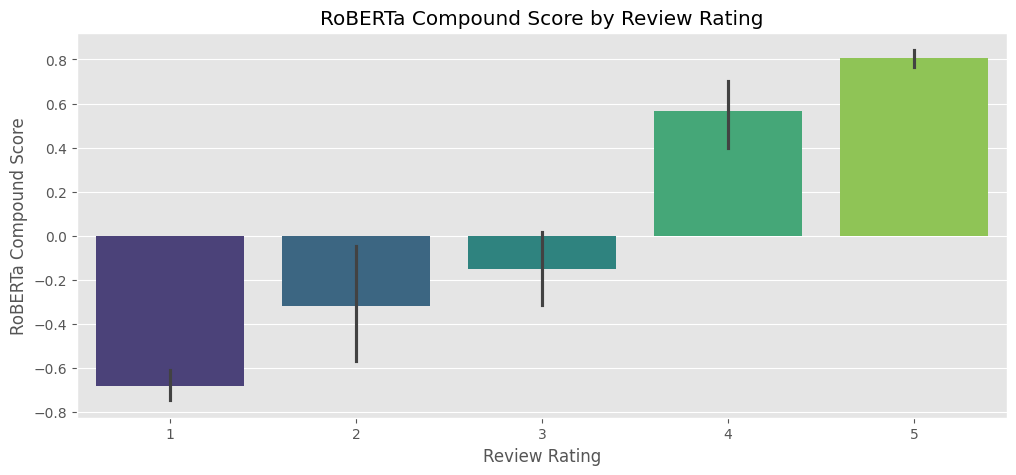

In [160]:
plt.figure(figsize=(12, 5))
sns.barplot(x='Review Rating', y='roberta_compound', data=results_df, palette='viridis')

plt.title('RoBERTa Compound Score by Review Rating')
plt.xlabel('Review Rating')
plt.ylabel('RoBERTa Compound Score')

plt.show()

C:\Users\P-DTC1\AppData\Local\Temp\ipykernel_27872\3413849227.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Review Rating', y='roberta_pos', ax=axs[0], palette='viridis')
C:\Users\P-DTC1\AppData\Local\Temp\ipykernel_27872\3413849227.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Review Rating', y='roberta_neu', ax=axs[1], palette='viridis')
C:\Users\P-DTC1\AppData\Local\Temp\ipykernel_27872\3413849227.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Review Rating', y='

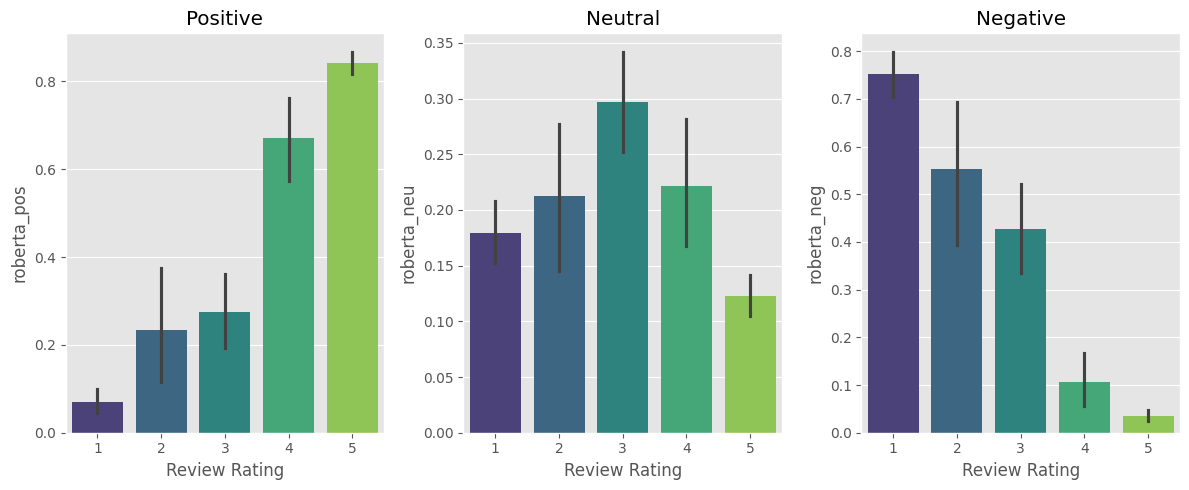

In [161]:
fig, axs = plt.subplots(1, 3, figsize=(12,5)) 
sns.barplot(data=results_df, x='Review Rating', y='roberta_pos', ax=axs[0], palette='viridis')
sns.barplot(data=results_df, x='Review Rating', y='roberta_neu', ax=axs[1], palette='viridis')
sns.barplot(data=results_df, x='Review Rating', y='roberta_neg', ax=axs[2], palette='viridis')

axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Training Roberta model for text classification (Negative, Neutral, Positive)

In [16]:
import transformers
import accelerate

print(transformers.__version__)
print(accelerate.__version__)

4.42.4
0.33.0


In [20]:
!pip install evaluate

   ---------------------------------------- 0.0/84.1 kB ? eta -:--:--
   ---------------------------------------- 84.1/84.1 kB 2.3 MB/s eta 0:00:00


### Important note, this code took me nearly 2 hours to run on 10 epochs. The reason for this may of been I used my CPU instead of my GPU so when executing this code below, take that into account. A suggestion could be running it on google colab or a cloud service if you have access to one and that way you can train it far more and **MUCH** quicker than I was able to. This hindered my scores and results as I only ran 10 epochs and did one training session explaining my sub 0.80 AUC scores etc.

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import Dataset
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
import numpy as np
import evaluate

file_path = r"C:\Users\P-DTC1\Downloads\Amazon Product Review Data.csv"
data = pd.read_csv(file_path)

data['Review Body'] = data['Review Body'].astype(str)

data['label'] = data['Review Rating'].apply(lambda x: 1 if x > 3 else 0)

train_df, val_df = train_test_split(data, test_size=0.2, random_state=42)

train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)

model_name = "roberta-base"
tokenizer = RobertaTokenizer.from_pretrained(model_name)

def tokenize_function(examples):
    return tokenizer(examples["Review Body"], padding="max_length", truncation=True)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
val_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])


model = RobertaForSequenceClassification.from_pretrained(model_name, num_labels=2)

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=10, # The number of epochs can be changed here. 
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    evaluation_strategy="epoch",
    save_strategy="epoch",  
    logging_dir='./logs',
    logging_steps=10,
    save_total_limit=2,
    load_best_model_at_end=True,  
    metric_for_best_model="accuracy",  
)

accuracy = evaluate.load("accuracy", trust_remote_code=True)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return accuracy.compute(predictions=predictions, references=labels)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()


Map: 100%|██████████| 102/102 [00:00<00:00, 1448.23 examples/s]
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\P-DTC1\Python Sentiment Analysis Project\.venv\Lib\site-packages\transformers\training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
  2%|▏         | 10/510 [02:04<1:43:35, 12.43s/it]

{'loss': 0.68, 'grad_norm': 2.535073757171631, 'learning_rate': 4.901960784313725e-05, 'epoch': 0.2}


  4%|▍         | 20/510 [04:06<1:38:50, 12.10s/it]

{'loss': 0.6007, 'grad_norm': 8.048259735107422, 'learning_rate': 4.803921568627452e-05, 'epoch': 0.39}


  6%|▌         | 30/510 [06:06<1:36:02, 12.01s/it]

{'loss': 0.4443, 'grad_norm': 12.830160140991211, 'learning_rate': 4.705882352941177e-05, 'epoch': 0.59}


  8%|▊         | 40/510 [08:07<1:34:34, 12.07s/it]

{'loss': 0.3413, 'grad_norm': 7.06898307800293, 'learning_rate': 4.607843137254902e-05, 'epoch': 0.78}


 10%|▉         | 50/510 [10:07<1:31:54, 11.99s/it]

{'loss': 0.3293, 'grad_norm': 29.303184509277344, 'learning_rate': 4.5098039215686275e-05, 'epoch': 0.98}


                                                  
 10%|█         | 51/510 [11:28<1:28:25, 11.56s/it]

{'eval_loss': 0.14448414742946625, 'eval_accuracy': 0.9411764705882353, 'eval_runtime': 70.6368, 'eval_samples_per_second': 1.444, 'eval_steps_per_second': 0.184, 'epoch': 1.0}


 12%|█▏        | 60/510 [13:23<1:43:29, 13.80s/it]

{'loss': 0.4679, 'grad_norm': 4.798142433166504, 'learning_rate': 4.411764705882353e-05, 'epoch': 1.18}


 14%|█▎        | 70/510 [15:23<1:28:50, 12.11s/it]

{'loss': 0.3191, 'grad_norm': 100.43501281738281, 'learning_rate': 4.313725490196079e-05, 'epoch': 1.37}


 16%|█▌        | 80/510 [17:24<1:26:40, 12.09s/it]

{'loss': 0.0392, 'grad_norm': 35.19502639770508, 'learning_rate': 4.215686274509804e-05, 'epoch': 1.57}


 18%|█▊        | 90/510 [19:24<1:23:54, 11.99s/it]

{'loss': 0.5129, 'grad_norm': 15.40237045288086, 'learning_rate': 4.11764705882353e-05, 'epoch': 1.76}


 20%|█▉        | 100/510 [21:24<1:21:53, 11.98s/it]

{'loss': 0.3584, 'grad_norm': 33.96712112426758, 'learning_rate': 4.0196078431372555e-05, 'epoch': 1.96}


                                                   
 20%|██        | 102/510 [22:57<1:18:28, 11.54s/it]

{'eval_loss': 0.15869270265102386, 'eval_accuracy': 0.9607843137254902, 'eval_runtime': 70.7195, 'eval_samples_per_second': 1.442, 'eval_steps_per_second': 0.184, 'epoch': 2.0}


 22%|██▏       | 110/510 [24:34<1:31:34, 13.74s/it]

{'loss': 0.1933, 'grad_norm': 2.3945987224578857, 'learning_rate': 3.9215686274509805e-05, 'epoch': 2.16}


 24%|██▎       | 120/510 [26:34<1:18:13, 12.03s/it]

{'loss': 0.1317, 'grad_norm': 695.9368286132812, 'learning_rate': 3.8235294117647055e-05, 'epoch': 2.35}


 25%|██▌       | 130/510 [28:34<1:15:58, 12.00s/it]

{'loss': 0.1669, 'grad_norm': 18.841033935546875, 'learning_rate': 3.725490196078432e-05, 'epoch': 2.55}


 27%|██▋       | 140/510 [30:34<1:13:53, 11.98s/it]

{'loss': 0.0822, 'grad_norm': 0.07131893932819366, 'learning_rate': 3.627450980392157e-05, 'epoch': 2.75}


 29%|██▉       | 150/510 [32:33<1:11:37, 11.94s/it]

{'loss': 0.0284, 'grad_norm': 0.052164655178785324, 'learning_rate': 3.529411764705883e-05, 'epoch': 2.94}


                                                   
 30%|███       | 153/510 [34:19<1:08:33, 11.52s/it]

{'eval_loss': 0.24443264305591583, 'eval_accuracy': 0.9607843137254902, 'eval_runtime': 70.8241, 'eval_samples_per_second': 1.44, 'eval_steps_per_second': 0.184, 'epoch': 3.0}


 31%|███▏      | 160/510 [36:08<1:28:52, 15.23s/it]

{'loss': 0.0008, 'grad_norm': 0.012906373478472233, 'learning_rate': 3.431372549019608e-05, 'epoch': 3.14}


 33%|███▎      | 170/510 [38:07<1:07:45, 11.96s/it]

{'loss': 0.1767, 'grad_norm': 0.0094919353723526, 'learning_rate': 3.3333333333333335e-05, 'epoch': 3.33}


 35%|███▌      | 180/510 [40:05<1:05:12, 11.86s/it]

{'loss': 0.1569, 'grad_norm': 0.15241171419620514, 'learning_rate': 3.235294117647059e-05, 'epoch': 3.53}


 37%|███▋      | 190/510 [42:04<1:02:56, 11.80s/it]

{'loss': 0.0455, 'grad_norm': 0.05674430727958679, 'learning_rate': 3.137254901960784e-05, 'epoch': 3.73}


 39%|███▉      | 200/510 [44:02<1:01:13, 11.85s/it]

{'loss': 0.2595, 'grad_norm': 0.024676049128174782, 'learning_rate': 3.0392156862745097e-05, 'epoch': 3.92}


                                                   
 40%|████      | 204/510 [45:59<58:21, 11.44s/it]

{'eval_loss': 0.2402147799730301, 'eval_accuracy': 0.9509803921568627, 'eval_runtime': 70.5398, 'eval_samples_per_second': 1.446, 'eval_steps_per_second': 0.184, 'epoch': 4.0}


 41%|████      | 210/510 [47:19<1:19:05, 15.82s/it]

{'loss': 0.018, 'grad_norm': 0.033419884741306305, 'learning_rate': 2.9411764705882354e-05, 'epoch': 4.12}


 43%|████▎     | 220/510 [49:17<58:06, 12.02s/it]  

{'loss': 0.0233, 'grad_norm': 0.012643893249332905, 'learning_rate': 2.8431372549019608e-05, 'epoch': 4.31}


 45%|████▌     | 230/510 [51:16<55:22, 11.86s/it]

{'loss': 0.001, 'grad_norm': 0.013573418371379375, 'learning_rate': 2.7450980392156865e-05, 'epoch': 4.51}


 47%|████▋     | 240/510 [53:15<53:12, 11.82s/it]

{'loss': 0.035, 'grad_norm': 1.2157634496688843, 'learning_rate': 2.647058823529412e-05, 'epoch': 4.71}


 49%|████▉     | 250/510 [55:14<51:34, 11.90s/it]

{'loss': 0.054, 'grad_norm': 0.01044655591249466, 'learning_rate': 2.5490196078431373e-05, 'epoch': 4.9}


                                                 
 50%|█████     | 255/510 [57:23<48:37, 11.44s/it]

{'eval_loss': 0.4209147095680237, 'eval_accuracy': 0.9313725490196079, 'eval_runtime': 70.5598, 'eval_samples_per_second': 1.446, 'eval_steps_per_second': 0.184, 'epoch': 5.0}


 51%|█████     | 260/510 [58:23<1:10:31, 16.93s/it]

{'loss': 0.001, 'grad_norm': 0.01192596647888422, 'learning_rate': 2.4509803921568626e-05, 'epoch': 5.1}


 53%|█████▎    | 270/510 [1:00:24<48:43, 12.18s/it]

{'loss': 0.0004, 'grad_norm': 0.006282661110162735, 'learning_rate': 2.3529411764705884e-05, 'epoch': 5.29}


 55%|█████▍    | 280/510 [1:02:24<46:10, 12.04s/it]

{'loss': 0.0004, 'grad_norm': 0.005969362333416939, 'learning_rate': 2.2549019607843138e-05, 'epoch': 5.49}


 57%|█████▋    | 290/510 [1:04:24<44:18, 12.08s/it]

{'loss': 0.0003, 'grad_norm': 0.006883402355015278, 'learning_rate': 2.1568627450980395e-05, 'epoch': 5.69}


 59%|█████▉    | 300/510 [1:06:24<41:43, 11.92s/it]

{'loss': 0.0205, 'grad_norm': 0.007328771520406008, 'learning_rate': 2.058823529411765e-05, 'epoch': 5.88}


                                                   
 60%|██████    | 306/510 [1:08:44<38:54, 11.44s/it]

{'eval_loss': 0.41589781641960144, 'eval_accuracy': 0.9411764705882353, 'eval_runtime': 70.7147, 'eval_samples_per_second': 1.442, 'eval_steps_per_second': 0.184, 'epoch': 6.0}


 61%|██████    | 310/510 [1:09:33<1:04:17, 19.29s/it]

{'loss': 0.0278, 'grad_norm': 0.004404072184115648, 'learning_rate': 1.9607843137254903e-05, 'epoch': 6.08}


 63%|██████▎   | 320/510 [1:11:34<38:44, 12.23s/it]  

{'loss': 0.0872, 'grad_norm': 35.41684341430664, 'learning_rate': 1.862745098039216e-05, 'epoch': 6.27}


 65%|██████▍   | 330/510 [1:13:35<36:07, 12.04s/it]

{'loss': 0.2161, 'grad_norm': 0.005215029697865248, 'learning_rate': 1.7647058823529414e-05, 'epoch': 6.47}


 67%|██████▋   | 340/510 [1:15:35<33:57, 11.98s/it]

{'loss': 0.0081, 'grad_norm': 0.006274441722780466, 'learning_rate': 1.6666666666666667e-05, 'epoch': 6.67}


 69%|██████▊   | 350/510 [1:17:34<31:58, 11.99s/it]

{'loss': 0.0556, 'grad_norm': 0.0063136848621070385, 'learning_rate': 1.568627450980392e-05, 'epoch': 6.86}


                                                   
 70%|███████   | 357/510 [1:20:07<29:14, 11.47s/it]

{'eval_loss': 0.32713305950164795, 'eval_accuracy': 0.9509803921568627, 'eval_runtime': 70.6691, 'eval_samples_per_second': 1.443, 'eval_steps_per_second': 0.184, 'epoch': 7.0}


 71%|███████   | 360/510 [1:20:44<55:43, 22.29s/it]  

{'loss': 0.0003, 'grad_norm': 0.00583158154040575, 'learning_rate': 1.4705882352941177e-05, 'epoch': 7.06}


 73%|███████▎  | 370/510 [1:22:43<28:29, 12.21s/it]

{'loss': 0.0002, 'grad_norm': 0.006094066891819239, 'learning_rate': 1.3725490196078432e-05, 'epoch': 7.25}


 75%|███████▍  | 380/510 [1:24:43<25:58, 11.99s/it]

{'loss': 0.0002, 'grad_norm': 0.00575721962377429, 'learning_rate': 1.2745098039215686e-05, 'epoch': 7.45}


 76%|███████▋  | 390/510 [1:26:43<24:00, 12.01s/it]

{'loss': 0.0002, 'grad_norm': 0.005711017642170191, 'learning_rate': 1.1764705882352942e-05, 'epoch': 7.65}


 78%|███████▊  | 400/510 [1:28:43<22:00, 12.00s/it]

{'loss': 0.0129, 'grad_norm': 0.004188256338238716, 'learning_rate': 1.0784313725490197e-05, 'epoch': 7.84}


                                                   
 80%|████████  | 408/510 [1:31:28<19:37, 11.54s/it]

{'eval_loss': 0.3306638300418854, 'eval_accuracy': 0.9607843137254902, 'eval_runtime': 70.7442, 'eval_samples_per_second': 1.442, 'eval_steps_per_second': 0.184, 'epoch': 8.0}


 80%|████████  | 410/510 [1:31:53<44:39, 26.79s/it]

{'loss': 0.0002, 'grad_norm': 0.005051393993198872, 'learning_rate': 9.803921568627451e-06, 'epoch': 8.04}


 82%|████████▏ | 420/510 [1:33:53<18:33, 12.37s/it]

{'loss': 0.0002, 'grad_norm': 0.004297446459531784, 'learning_rate': 8.823529411764707e-06, 'epoch': 8.24}


 84%|████████▍ | 430/510 [1:35:52<15:56, 11.95s/it]

{'loss': 0.0002, 'grad_norm': 0.005928281228989363, 'learning_rate': 7.84313725490196e-06, 'epoch': 8.43}


 86%|████████▋ | 440/510 [1:37:51<13:55, 11.94s/it]

{'loss': 0.0002, 'grad_norm': 0.0037749384064227343, 'learning_rate': 6.862745098039216e-06, 'epoch': 8.63}


 88%|████████▊ | 450/510 [1:39:51<11:58, 11.98s/it]

{'loss': 0.0002, 'grad_norm': 0.004831682424992323, 'learning_rate': 5.882352941176471e-06, 'epoch': 8.82}


                                                   
 90%|█████████ | 459/510 [1:42:49<09:46, 11.49s/it]

{'eval_loss': 0.33633315563201904, 'eval_accuracy': 0.9607843137254902, 'eval_runtime': 71.6426, 'eval_samples_per_second': 1.424, 'eval_steps_per_second': 0.181, 'epoch': 9.0}


 90%|█████████ | 460/510 [1:43:02<27:55, 33.51s/it]

{'loss': 0.0002, 'grad_norm': 0.004417649935930967, 'learning_rate': 4.901960784313726e-06, 'epoch': 9.02}


 92%|█████████▏| 470/510 [1:45:02<08:24, 12.61s/it]

{'loss': 0.0002, 'grad_norm': 0.0029229384381324053, 'learning_rate': 3.92156862745098e-06, 'epoch': 9.22}


 94%|█████████▍| 480/510 [1:47:02<05:59, 11.97s/it]

{'loss': 0.0002, 'grad_norm': 0.0034848207142204046, 'learning_rate': 2.9411764705882355e-06, 'epoch': 9.41}


 96%|█████████▌| 490/510 [1:49:01<03:57, 11.90s/it]

{'loss': 0.0002, 'grad_norm': 0.003702107584103942, 'learning_rate': 1.96078431372549e-06, 'epoch': 9.61}


 98%|█████████▊| 500/510 [1:51:00<01:58, 11.87s/it]

{'loss': 0.0002, 'grad_norm': 0.005020678509026766, 'learning_rate': 9.80392156862745e-07, 'epoch': 9.8}


100%|██████████| 510/510 [1:52:56<00:00, 11.34s/it]

{'loss': 0.0002, 'grad_norm': 0.004983128979802132, 'learning_rate': 0.0, 'epoch': 10.0}


                                                   
100%|██████████| 510/510 [1:54:08<00:00, 11.34s/it]

{'eval_loss': 0.33782824873924255, 'eval_accuracy': 0.9607843137254902, 'eval_runtime': 70.3929, 'eval_samples_per_second': 1.449, 'eval_steps_per_second': 0.185, 'epoch': 10.0}


100%|██████████| 510/510 [1:54:09<00:00, 13.43s/it]

{'train_runtime': 6849.6449, 'train_samples_per_second': 0.594, 'train_steps_per_second': 0.074, 'train_loss': 0.1156747771363121, 'epoch': 10.0}


TrainOutput(global_step=510, training_loss=0.1156747771363121, metrics={'train_runtime': 6849.6449, 'train_samples_per_second': 0.594, 'train_steps_per_second': 0.074, 'total_flos': 1070861995315200.0, 'train_loss': 0.1156747771363121, 'epoch': 10.0})

In [22]:
eval_results = trainer.evaluate()
print(eval_results)

100%|██████████| 13/13 [01:08<00:00,  5.26s/it]

{'eval_loss': 0.15869270265102386, 'eval_accuracy': 0.9607843137254902, 'eval_runtime': 74.1535, 'eval_samples_per_second': 1.376, 'eval_steps_per_second': 0.175, 'epoch': 10.0}


In [ ]:
import pandas as pd

file_path = r"C:\Users\P-DTC1\Downloads\Amazon Product Review Data.csv"
data = pd.read_csv(file_path)

data['Review Body'] = data['Review Body'].astype(str)

def perform_sentiment_analysis(text_list):
    inputs = tokenizer(text_list, padding=True, truncation=True, return_tensors="pt")

    model.eval() 
    with torch.no_grad():
        outputs = model(**inputs)

    predictions = np.argmax(outputs.logits, axis=-1)
    return ["Positive" if pred == 1 else "Negative" for pred in predictions]

data['Sentiment'] = perform_sentiment_analysis(data['Review Body'].tolist())

data[['Review Body', 'Sentiment']].head()


In [26]:
data[0:17]

,ID,Review Title,Review Rating,Review Body,Sentiment
0,1,Absolutely fantastic,5,"I'm in love with these headphones, I couldn't ...",Positive
1,2,"awful, avoid (HESH ANC)",1,i bought these after seeing good reviews howev...,Negative
2,3,great,5,great,Positive
3,4,Great product,5,Excellent,Positive
4,5,Great sound,5,My son bought these even though he has air pod...,Positive
5,6,It’s good for the price but not too loud.,4,It’s comfortable and has a great battery life....,Positive
6,7,Venue was better,3,I had the skullcandy Venue headphones for year...,Negative
7,8,Good sound and noise cancelling,5,"Great fit (style) and sound, and the noise can...",Positive
8,9,cost effective headphone option,4,When on sale and are cheap these are definitel...,Positive
9,10,Good but ehhhh…,3,The noise cancelling (and ambient mode) are go...,Negative


#### I used the SIA from VADER to get the compound scores as I couldn't find how to do it for Roberta or from another library in the given time I had to complete the project. Therefore if you know how to or have suggestions share them with me or make alterations for your code and models.

In [5]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer 

# Load the previous dataset (assuming it's still available in memory)
file_path = r"C:\Users\P-DTC1\Downloads\Amazon Product Review Data.csv"
data = pd.read_csv(file_path)

# Ensure 'Review Body' is treated as string
data['Review Body'] = data['Review Body'].astype(str)

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to perform sentiment intensity analysis on new data
def perform_sentiment_intensity_analysis(text_list):
    sentiments = []
    for text in text_list:
        scores = analyzer.polarity_scores(text)
        sentiments.append(scores)
    return sentiments

# Perform sentiment intensity analysis on the 'Review Body' column
sentiment_scores = perform_sentiment_intensity_analysis(data['Review Body'].tolist())

# Convert the sentiment scores to a DataFrame and concatenate with the original data
sentiment_df = pd.DataFrame(sentiment_scores)
result_df = pd.concat([data, sentiment_df], axis=1)

# Display the results
result_df[['Review Body', 'neg', 'neu', 'pos', 'compound']].head()

result_df


,ID,Review Title,Review Rating,Review Body,neg,neu,pos,compound
0,1,Absolutely fantastic,5,"I'm in love with these headphones, I couldn't ...",0.051,0.575,0.374,0.9795
1,2,"awful, avoid (HESH ANC)",1,i bought these after seeing good reviews howev...,0.187,0.771,0.042,-0.8396
2,3,great,5,great,0.000,0.000,1.000,0.6249
3,4,Great product,5,Excellent,0.000,0.000,1.000,0.5719
4,5,Great sound,5,My son bought these even though he has air pod...,0.000,0.837,0.163,0.6249
...,...,...,...,...,...,...,...,...
504,505,Dim and low res,1,854x480 is frankly ridiculous in 2024. This th...,0.118,0.802,0.080,-0.2244
505,506,Personal projector,5,If you don't want to sleep on the couch while ...,0.034,0.885,0.081,0.4048
506,507,Amazing little device that delivers all promised,5,Well built little can that with the added aid ...,0.047,0.789,0.164,0.4588
507,508,Great Projector,5,Love the easy use and robust construction. Gre...,0.000,0.306,0.694,0.9274


# Sentiment Analysis for Hospitality Reviews

In [162]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import torch
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from tqdm import tqdm
from scipy.special import softmax
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve
from scipy.stats import ttest_rel

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\P-DTC1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\P-DTC1\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\P-DTC1\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\P-DTC1\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\P-DTC1\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## **BERT MODEL**

In [163]:
# # file = r"C:\Users\P-DTC1\Documents\Excel work\hospitality reviews.csv"
# df = pd.read_csv(file, encoding='latin1')
# df

,ID,Review Title,Review Body,Review Rating
0,1,review-01,The place is as described. Good value for money.,5
1,2,review-02,First comms contained everything needed. Great...,5
2,3,review-03,I actually did not stay because it did not wor...,5
3,4,review-04,Great! Thank you very much!,5
4,5,review-05,I stayed here originally for 2 nights this wee...,5
...,...,...,...,...
195,196,review-196,Lucy's cottattage is the best air bnb I've eve...,5
196,197,review-197,Short but sweet stay :-)) Met Lucy when I chec...,5
197,198,review-198,We chose Lucy?s accommodation based on the pho...,5
198,199,review-199,A real home from home. Lucy makes sure of that...,5


In [164]:
# tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [165]:
# def sentiment_score(review_body):
#     tokens = tokenizer.encode(review_body, return_tensors='pt')
#     result = model(tokens)
#     return int(torch.argmax(result.logits))+1

In [166]:
# df['BERT Rating'] = df['Review Body'].apply(lambda x: sentiment_score(x[:512]))

In [167]:

# def classify_bert_sentiment(review_rating):
#     if review_rating >= 4:
#         return 'Positive'
#     elif review_rating == 3:
#         return 'Neutral'
#     else:
#         return 'Negative'

# df['bert_sentiment'] = df['BERT Rating'].apply(classify_bert_sentiment)

# df

,ID,Review Title,Review Body,Review Rating,BERT Rating,bert_sentiment
0,1,review-01,The place is as described. Good value for money.,5,4,Positive
1,2,review-02,First comms contained everything needed. Great...,5,5,Positive
2,3,review-03,I actually did not stay because it did not wor...,5,3,Neutral
3,4,review-04,Great! Thank you very much!,5,5,Positive
4,5,review-05,I stayed here originally for 2 nights this wee...,5,4,Positive
...,...,...,...,...,...,...
195,196,review-196,Lucy's cottattage is the best air bnb I've eve...,5,5,Positive
196,197,review-197,Short but sweet stay :-)) Met Lucy when I chec...,5,4,Positive
197,198,review-198,We chose Lucy?s accommodation based on the pho...,5,4,Positive
198,199,review-199,A real home from home. Lucy makes sure of that...,5,5,Positive


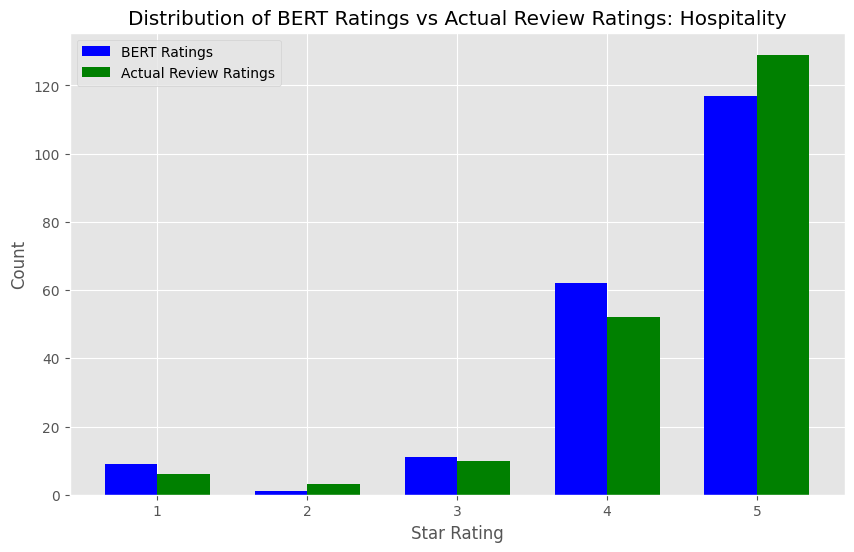

In [168]:
# bert_rating_counts = df['BERT Rating'].value_counts().sort_index()

# actual_rating_counts = df['Review Rating'].value_counts().sort_index()

# labels = bert_rating_counts.index
# width = 0.35

# fig, ax = plt.subplots(figsize=(10, 6))

# ax.bar(labels - width/2, bert_rating_counts, width, label='BERT Ratings', color='blue')
# ax.bar(labels + width/2, actual_rating_counts, width, label='Actual Review Ratings', color='green')

# ax.set_xlabel('Star Rating')
# ax.set_ylabel('Count')
# ax.set_title('Distribution of BERT Ratings vs Actual Review Ratings: Hospitality')
# ax.set_xticks(labels)
# ax.set_xticklabels(labels)
# ax.legend()

# plt.show()

# **VADERS MODEL**

In [169]:
file = r"C:\Users\P-DTC1\Documents\Excel work\hospitality reviews.csv"
df = pd.read_csv(file, encoding='latin1')
df

,ID,Review Title,Review Body,Review Rating
0,1,review-01,The place is as described. Good value for money.,5
1,2,review-02,First comms contained everything needed. Great...,5
2,3,review-03,I actually did not stay because it did not wor...,5
3,4,review-04,Great! Thank you very much!,5
4,5,review-05,I stayed here originally for 2 nights this wee...,5
...,...,...,...,...
195,196,review-196,Lucy's cottattage is the best air bnb I've eve...,5
196,197,review-197,Short but sweet stay :-)) Met Lucy when I chec...,5
197,198,review-198,We chose Lucy?s accommodation based on the pho...,5
198,199,review-199,A real home from home. Lucy makes sure of that...,5


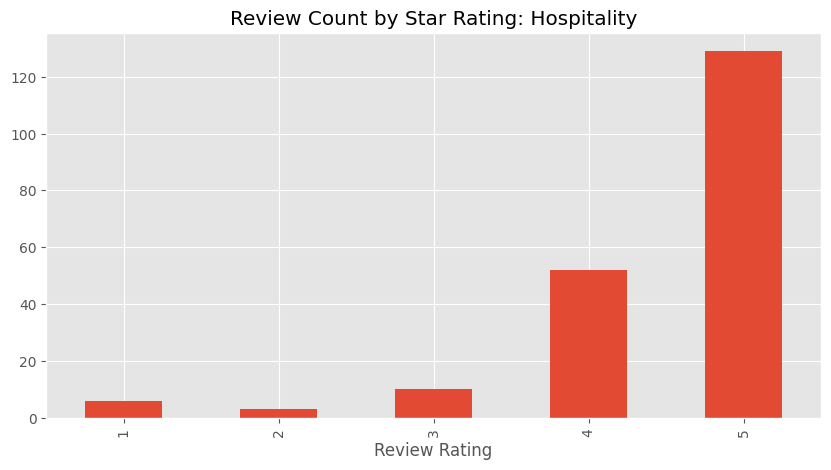

In [170]:
ax = df['Review Rating'].value_counts().sort_index().plot(kind='bar', title='Review Count by Star Rating: Hospitality', 
                                                          figsize=(10, 5))

In [171]:
sia = SentimentIntensityAnalyzer()

In [172]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    review_body = row['Review Body']
    myid = row['ID']
    res[myid] = sia.polarity_scores(review_body)

res

100%|██████████| 200/200 [00:00<00:00, 2513.92it/s]


{1: {'neg': 0.0, 'neu': 0.569, 'pos': 0.431, 'compound': 0.6486},
 2: {'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.6249},
 3: {'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'compound': 0.9827},
 4: {'neg': 0.0, 'neu': 0.295, 'pos': 0.705, 'compound': 0.8011},
 5: {'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'compound': 0.89},
 6: {'neg': 0.079, 'neu': 0.743, 'pos': 0.179, 'compound': 0.8969},
 7: {'neg': 0.035, 'neu': 0.739, 'pos': 0.225, 'compound': 0.9067},
 8: {'neg': 0.0, 'neu': 0.235, 'pos': 0.765, 'compound': 0.7574},
 9: {'neg': 0.0, 'neu': 0.248, 'pos': 0.752, 'compound': 0.9031},
 10: {'neg': 0.098, 'neu': 0.845, 'pos': 0.057, 'compound': -0.6342},
 11: {'neg': 0.0, 'neu': 0.618, 'pos': 0.382, 'compound': 0.9079},
 12: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 13: {'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'compound': 0.6249},
 14: {'neg': 0.115, 'neu': 0.832, 'pos': 0.053, 'compound': -0.9264},
 15: {'neg': 0.27, 'neu': 0.73, 'pos': 0.0, 'compound': -0.7506},
 16:

In [173]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'ID'})
vaders = vaders.merge(df, how='left')

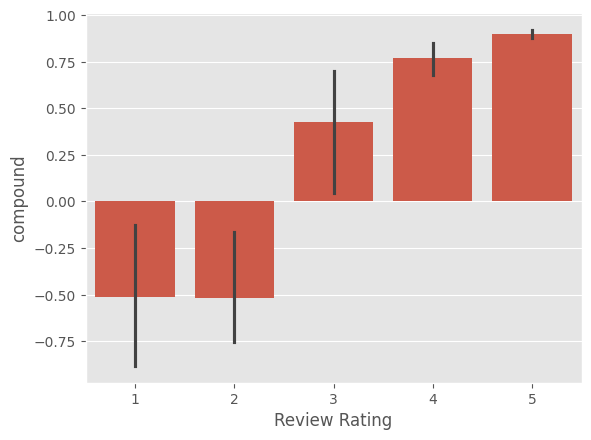

In [174]:
sns.barplot(data=vaders, x='Review Rating', y='compound')
ax.set_title('Compound Scorea Against Amazon Star Reviews')
plt.show()

# **RoBERTa MODEL**

In [175]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [176]:
example = df['Review Body'][50]
print(example)

Good location.


In [177]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}

In [178]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg':scores[0],
        'roberta_neu':scores[1],
        'roberta_pos':scores[2]
    }
    return scores_dict

In [179]:
def calculate_roberta_compound(scores):
    weights = {'roberta_neg': -1, 'roberta_neu': 0, 'roberta_pos': 1}
    compound_score = (weights['roberta_neg'] * scores['roberta_neg'] +
                      weights['roberta_neu'] * scores['roberta_neu'] +
                      weights['roberta_pos'] * scores['roberta_pos'])
    return compound_score

In [180]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        review_body = row['Review Body']
        myid = row['ID']
        vader_result = sia.polarity_scores(review_body)
        vader_result_rename = { 
            'vader_neg': vader_result['neg'],
            'vader_neu': vader_result['neu'],
            'vader_pos': vader_result['pos'],
            'vader_compound': vader_result['compound']
        }
        roberta_result = polarity_scores_roberta(review_body)
        roberta_result['roberta_compound'] = calculate_roberta_compound(roberta_result)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f"Broke for ID {myid}")

100%|██████████| 200/200 [00:14<00:00, 14.08it/s]


In [181]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'ID'})
results_df = results_df.merge(df, how='left')
results_df

,ID,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,roberta_compound,Review Title,Review Body,Review Rating
0,1,0.000,0.569,0.431,0.6486,0.008284,0.125377,0.866338,0.858054,review-01,The place is as described. Good value for money.,5
1,2,0.000,0.806,0.194,0.6249,0.006586,0.084601,0.908812,0.902226,review-02,First comms contained everything needed. Great...,5
2,3,0.000,0.718,0.282,0.9827,0.031721,0.159307,0.808973,0.777252,review-03,I actually did not stay because it did not wor...,5
3,4,0.000,0.295,0.705,0.8011,0.001595,0.008012,0.990393,0.988797,review-04,Great! Thank you very much!,5
4,5,0.000,0.817,0.183,0.8900,0.002273,0.024771,0.972956,0.970682,review-05,I stayed here originally for 2 nights this wee...,5
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,0.000,0.676,0.324,0.9313,0.001435,0.008510,0.990055,0.988620,review-196,Lucy's cottattage is the best air bnb I've eve...,5
196,197,0.029,0.752,0.220,0.9683,0.037739,0.156565,0.805696,0.767957,review-197,Short but sweet stay :-)) Met Lucy when I chec...,5
197,198,0.000,0.796,0.204,0.9230,0.003536,0.018745,0.977719,0.974182,review-198,We chose Lucy?s accommodation based on the pho...,5
198,199,0.000,0.703,0.297,0.9261,0.001624,0.017845,0.980532,0.978908,review-199,A real home from home. Lucy makes sure of that...,5


In [182]:
def classify_vader_sentiment(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

def classify_roberta_sentiment(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

results_df['vader_sentiment'] = results_df['vader_compound'].apply(classify_vader_sentiment)
results_df['roberta_sentiment'] = results_df['roberta_compound'].apply(classify_roberta_sentiment)

In [183]:
def classify_vader_star_rating(compound):
    if compound > 0.6:
        return 5
    elif compound > 0.2:
        return 4
    elif compound > -0.2:
        return 3
    elif compound > -0.6:
        return 2
    else:
        return 1

def classify_roberta_star_rating(compound):
    if compound > 0.6:
        return 5
    elif compound > 0.2:
        return 4
    elif compound > -0.2:
        return 3
    elif compound > -0.6:
        return 2
    else:
        return 1
results_df['vader_star_rating'] = results_df['vader_compound'].apply(classify_vader_star_rating)
results_df['roberta_star_rating'] = results_df['roberta_compound'].apply(classify_roberta_star_rating)

results_df

,ID,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,roberta_compound,Review Title,Review Body,Review Rating,vader_sentiment,roberta_sentiment,vader_star_rating,roberta_star_rating
0,1,0.000,0.569,0.431,0.6486,0.008284,0.125377,0.866338,0.858054,review-01,The place is as described. Good value for money.,5,Positive,Positive,5,5
1,2,0.000,0.806,0.194,0.6249,0.006586,0.084601,0.908812,0.902226,review-02,First comms contained everything needed. Great...,5,Positive,Positive,5,5
2,3,0.000,0.718,0.282,0.9827,0.031721,0.159307,0.808973,0.777252,review-03,I actually did not stay because it did not wor...,5,Positive,Positive,5,5
3,4,0.000,0.295,0.705,0.8011,0.001595,0.008012,0.990393,0.988797,review-04,Great! Thank you very much!,5,Positive,Positive,5,5
4,5,0.000,0.817,0.183,0.8900,0.002273,0.024771,0.972956,0.970682,review-05,I stayed here originally for 2 nights this wee...,5,Positive,Positive,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,0.000,0.676,0.324,0.9313,0.001435,0.008510,0.990055,0.988620,review-196,Lucy's cottattage is the best air bnb I've eve...,5,Positive,Positive,5,5
196,197,0.029,0.752,0.220,0.9683,0.037739,0.156565,0.805696,0.767957,review-197,Short but sweet stay :-)) Met Lucy when I chec...,5,Positive,Positive,5,5
197,198,0.000,0.796,0.204,0.9230,0.003536,0.018745,0.977719,0.974182,review-198,We chose Lucy?s accommodation based on the pho...,5,Positive,Positive,5,5
198,199,0.000,0.703,0.297,0.9261,0.001624,0.017845,0.980532,0.978908,review-199,A real home from home. Lucy makes sure of that...,5,Positive,Positive,5,5


C:\Users\P-DTC1\AppData\Local\Temp\ipykernel_27872\10600383.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Review Rating', y='roberta_compound', data=results_df, palette='viridis')


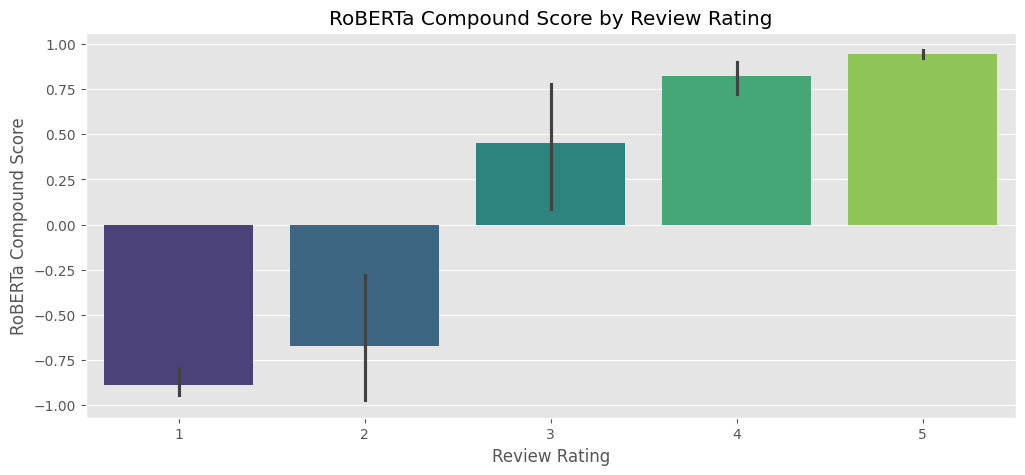

In [184]:
plt.figure(figsize=(12, 5))
sns.barplot(x='Review Rating', y='roberta_compound', data=results_df, palette='viridis')

plt.title('RoBERTa Compound Score by Review Rating')
plt.xlabel('Review Rating')
plt.ylabel('RoBERTa Compound Score')

plt.show()

C:\Users\P-DTC1\AppData\Local\Temp\ipykernel_27872\1932754947.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Review Rating', y='roberta_pos', ax=axs[0], palette='viridis')
C:\Users\P-DTC1\AppData\Local\Temp\ipykernel_27872\1932754947.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Review Rating', y='roberta_neu', ax=axs[1], palette='viridis')
C:\Users\P-DTC1\AppData\Local\Temp\ipykernel_27872\1932754947.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Review Rating', y='

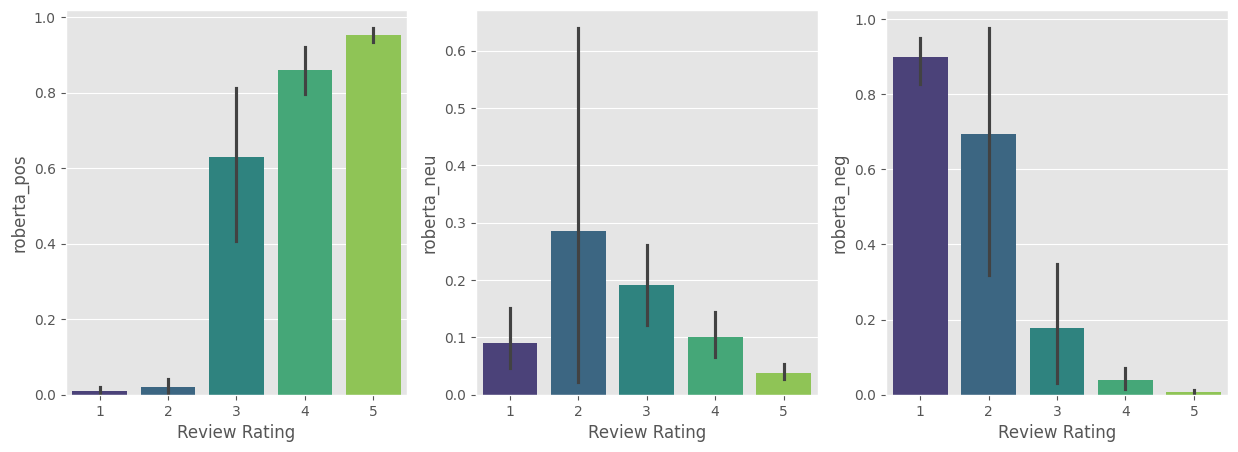

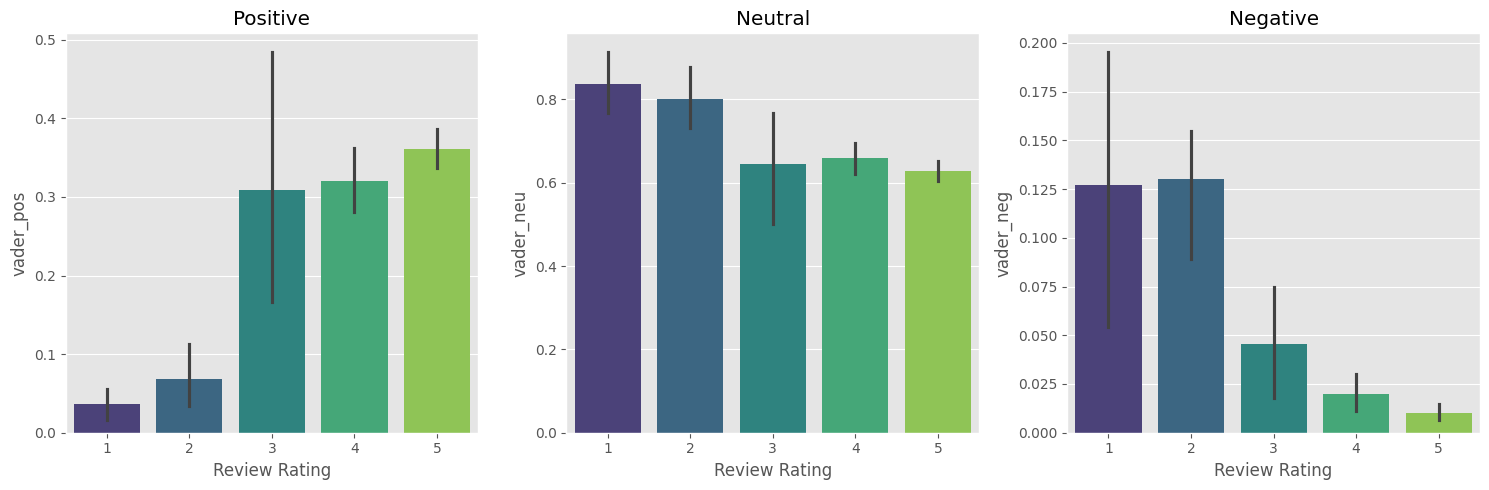

In [185]:
fig, axs = plt.subplots(1, 3, figsize=(15,5)) 
sns.barplot(data=results_df, x='Review Rating', y='roberta_pos', ax=axs[0], palette='viridis')
sns.barplot(data=results_df, x='Review Rating', y='roberta_neu', ax=axs[1], palette='viridis')
sns.barplot(data=results_df, x='Review Rating', y='roberta_neg', ax=axs[2], palette='viridis')

fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.barplot(data=results_df, x='Review Rating', y='vader_pos', ax=axs[0], palette='viridis')
sns.barplot(data=results_df, x='Review Rating', y='vader_neu', ax=axs[1], palette='viridis')
sns.barplot(data=results_df, x='Review Rating', y='vader_neg', ax=axs[2], palette='viridis')

axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# **Model Comparison**

# Model Comparison for Electronics

In [ ]:
file = r"C:\Users\P-DTC1\Documents\Excel work\Sentiments for all Models and Raters.csv"
data = pd.read_csv(file, encoding='latin1')
data.head()

In [ ]:
models = ['GPT Sentiment', 'Gemini Sentiment', 'VADER Sentiment', 'RoBERTa Sentiment']
manual_raters = ['Manual Rater 1', 'Manual Rater 2']

def plot_confusion_matrix(cm, model, rater):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel(f'{model} Predictions')
    plt.ylabel(f'{rater} Labels')
    plt.title(f'Confusion Matrix: {model} vs {rater}')
    plt.show()

confusion_matrices = {}
for model in models:
    for rater in manual_raters:
        cm = confusion_matrix(data[rater], data[model], labels=['Negative', 'Neutral', 'Positive'])
        confusion_matrices[f'{model} vs {rater}'] = cm
        plot_confusion_matrix(cm, model, rater)

---------------------------------------------------------------------------------------------------------------

In [11]:
file = r"C:\Users\P-DTC1\Documents\Excel work\Sentiments for all Models and Raters.csv"
data = pd.read_csv(file, encoding='latin1')
data

,GPT Sentiment,Gemini Sentiment,Manual Rater 1,Manual Rater 2,VADER Sentiment,RoBERTa Sentiment,Roberta Sentiment Trained
0,Positive,Positive,Positive,Positive,Positive,Positive,Positive
1,Positive,Negative,Negative,Negative,Negative,Negative,Negative
2,Positive,Positive,Positive,Positive,Positive,Positive,Positive
3,Positive,Positive,Positive,Positive,Positive,Positive,Positive
4,Positive,Positive,Positive,Positive,Positive,Positive,Positive
...,...,...,...,...,...,...,...
379,Positive,Positive,Positive,Positive,Negative,Negative,Positive
380,Negative,Positive,Positive,Negative,Positive,Positive,Positive
381,Negative,Negative,Negative,Negative,Positive,Positive,Positive
382,Positive,Negative,Positive,Positive,Positive,Positive,Negative


# Metrics for Manual Rater 1

In [73]:
sentiment_mapping = {
    'Positive': 1,
    'Negative': 0
}

clean_data = data.dropna(subset=['Manual Rater 1', 'GPT Sentiment', 'Gemini Sentiment', 'VADER Sentiment', 'RoBERTa Sentiment', 'Roberta Sentiment Trained'])

manual_numerical = clean_data['Manual Rater 1'].map(sentiment_mapping)
gpt_numerical = clean_data['GPT Sentiment'].map(sentiment_mapping)
gemini_numerical = clean_data['Gemini Sentiment'].map(sentiment_mapping)
vader_numerical = clean_data['VADER Sentiment'].map(sentiment_mapping)
roberta_numerical = clean_data['RoBERTa Sentiment'].map(sentiment_mapping)
roberta_trained_numerical = clean_data['Roberta Sentiment Trained'].map(sentiment_mapping)

manual_numerical.isna().sum(), gpt_numerical.isna().sum(), gemini_numerical.isna().sum(), vader_numerical.isna().sum(), roberta_numerical.isna().sum(), roberta_trained_numerical.isna().sum()

clean_indices = manual_numerical.dropna().index.intersection(
    gpt_numerical.dropna().index
).intersection(
    gemini_numerical.dropna().index
).intersection(
    vader_numerical.dropna().index
).intersection(
    roberta_numerical.dropna().index
).intersection(
    roberta_trained_numerical.dropna().index
)

manual_numerical_clean = manual_numerical.loc[clean_indices]
gpt_numerical_clean = gpt_numerical.loc[clean_indices]
gemini_numerical_clean = gemini_numerical.loc[clean_indices]
vader_numerical_clean = vader_numerical.loc[clean_indices]
roberta_numerical_clean = roberta_numerical.loc[clean_indices]
roberta_trained_numerical_clean = roberta_trained_numerical.loc[clean_indices]

def calculate_metrics(predictions, true_labels):
    accuracy = accuracy_score(true_labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predictions, average='weighted')
    conf_matrix = confusion_matrix(true_labels, predictions)
    
    return accuracy, precision, recall, f1, conf_matrix

gpt_metrics = calculate_metrics(gpt_numerical_clean, manual_numerical_clean)
gemini_metrics = calculate_metrics(gemini_numerical_clean, manual_numerical_clean)
vader_metrics = calculate_metrics(vader_numerical_clean, manual_numerical_clean)
roberta_metrics = calculate_metrics(roberta_numerical_clean, manual_numerical_clean)
roberta_trained_metrics = calculate_metrics(roberta_trained_numerical_clean, manual_numerical_clean)

metrics_df = pd.DataFrame({
    'Model': ['GPT', 'Gemini', 'VADER', 'RoBERTa', 'Roberta Trained'],
    'Accuracy': [gpt_metrics[0], gemini_metrics[0], vader_metrics[0], roberta_metrics[0], roberta_trained_metrics[0]],
    'Precision': [gpt_metrics[1], gemini_metrics[1], vader_metrics[1], roberta_metrics[1], roberta_trained_metrics[1]],
    'Recall': [gpt_metrics[2], gemini_metrics[2], vader_metrics[2], roberta_metrics[2], roberta_trained_metrics[2]],
    'F1-Score': [gpt_metrics[3], gemini_metrics[3], vader_metrics[3], roberta_metrics[3], roberta_trained_metrics[3]],
    'Confusion Matrix': [gpt_metrics[4], gemini_metrics[4], vader_metrics[4], roberta_metrics[4], roberta_trained_metrics[4]]
})

metrics_df


,Model,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
0,GPT,0.830601,0.848473,0.830601,0.812177,"[[55, 58], [4, 249]]"
1,Gemini,0.767760,0.773403,0.767760,0.770104,"[[75, 38], [47, 206]]"
2,VADER,0.663934,0.637807,0.663934,0.645491,"[[35, 78], [45, 208]]"
3,RoBERTa,0.699454,0.695158,0.699454,0.697116,"[[55, 58], [52, 201]]"
4,Roberta Trained,0.732240,0.742385,0.732240,0.736241,"[[71, 42], [56, 197]]"


## Confusion Matrix

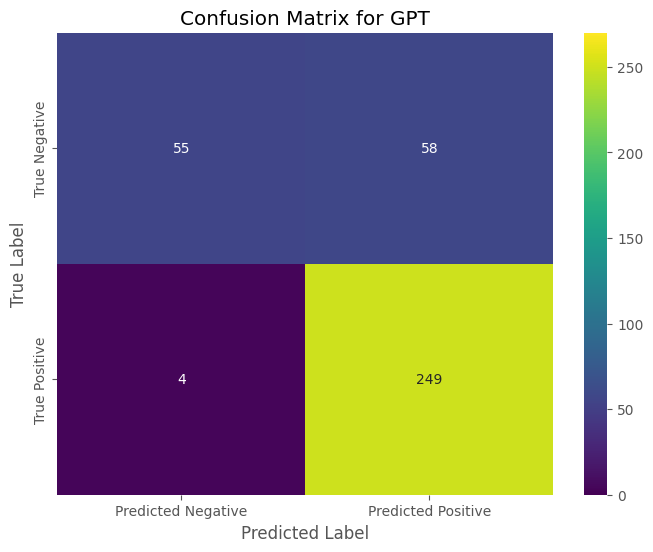

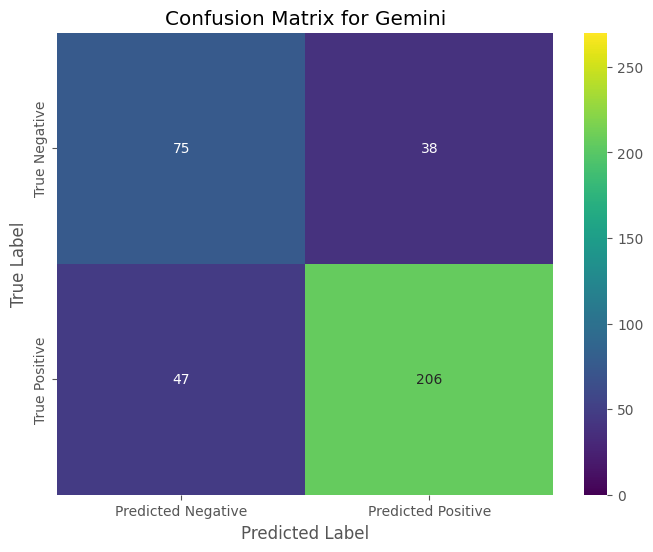

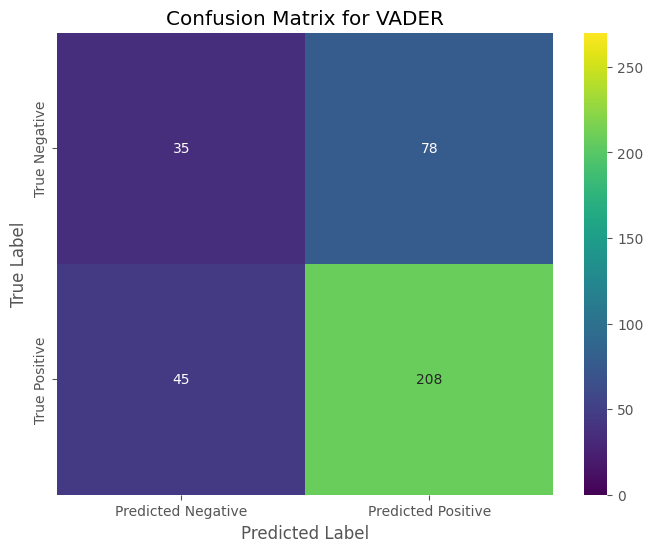

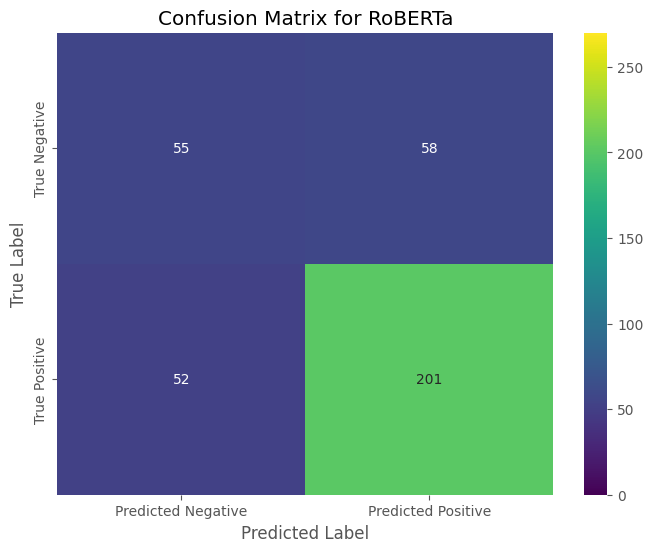

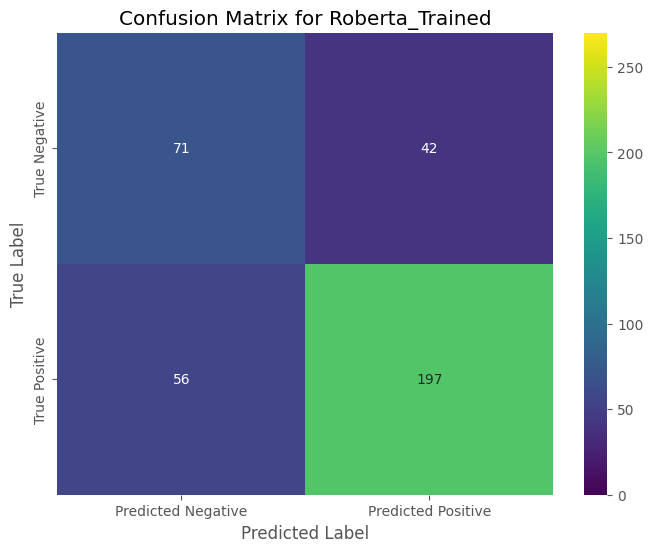

In [74]:
def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', vmin=0, vmax=270,
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['True Negative', 'True Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(gpt_metrics[4], 'GPT'),
plot_confusion_matrix(gemini_metrics[4], 'Gemini'),
plot_confusion_matrix(vader_metrics[4], 'VADER'),
plot_confusion_matrix(roberta_metrics[4], 'RoBERTa')
plot_confusion_matrix(roberta_trained_metrics[4], 'Roberta_Trained')

## AUC

In [75]:

gpt_auc_pr = average_precision_score(manual_numerical_clean, gpt_numerical_clean)
gemini_auc_pr = average_precision_score(manual_numerical_clean, gemini_numerical_clean)
vader_auc_pr = average_precision_score(manual_numerical_clean, vader_numerical_clean)
roberta_auc_pr = average_precision_score(manual_numerical_clean, roberta_numerical_clean)
roberta_trained_auc_pr = average_precision_score(manual_numerical_clean, roberta_trained_numerical_clean)
metrics_df = pd.DataFrame({
    'Model': ['GPT', 'Gemini', 'VADER', 'RoBERTa', 'Roberta Sentiment Trained'],
    'Accuracy': [gpt_metrics[0], gemini_metrics[0], vader_metrics[0], roberta_metrics[0], roberta_trained_metrics[0]],
    'Precision': [gpt_metrics[1], gemini_metrics[1], vader_metrics[1], roberta_metrics[1], roberta_trained_metrics[1]],
    'Recall': [gpt_metrics[2], gemini_metrics[2], vader_metrics[2], roberta_metrics[2], roberta_trained_metrics[2]],
    'F1-Score': [gpt_metrics[3], gemini_metrics[3], vader_metrics[3], roberta_metrics[3], roberta_trained_metrics[3]],
    'AUC-PR': [gpt_auc_pr, gemini_auc_pr, vader_auc_pr, roberta_auc_pr, roberta_trained_auc_pr]
})

metrics_df


,Model,Accuracy,Precision,Recall,F1-Score,AUC-PR
0,GPT,0.830601,0.848473,0.830601,0.812177,0.809181
1,Gemini,0.767760,0.773403,0.767760,0.770104,0.815838
2,VADER,0.663934,0.637807,0.663934,0.645491,0.720867
3,RoBERTa,0.699454,0.695158,0.699454,0.697116,0.758632
4,Roberta Sentiment Trained,0.732240,0.742385,0.732240,0.736241,0.794827


## Bar Chart depicting TP vs FP for each Model

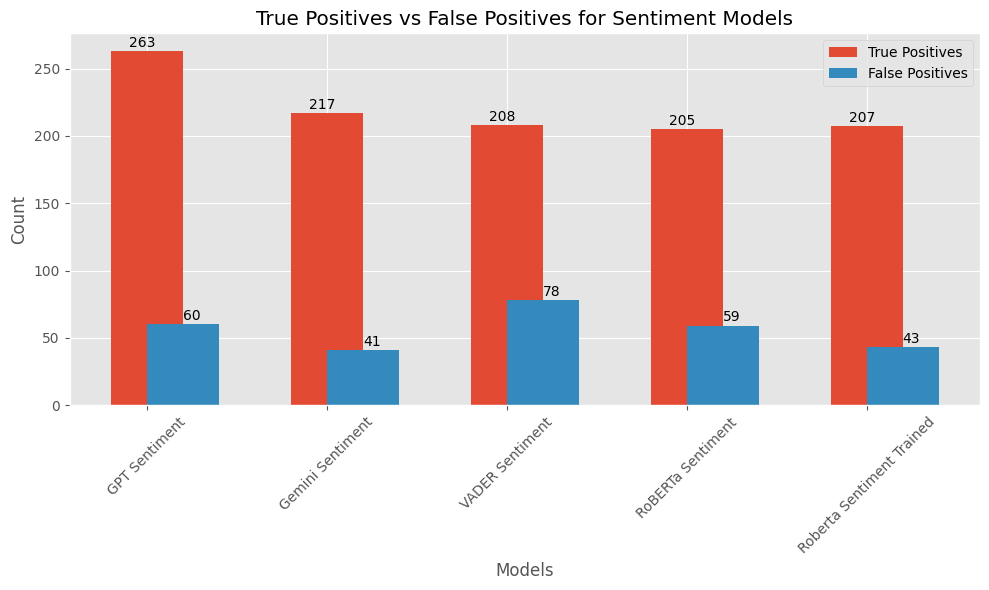

In [76]:
def calculate_true_false_positives(sentiment_col, manual_col):
    tp = ((data[sentiment_col] == 'Positive') & (data[manual_col] == 'Positive')).sum()
    fp = ((data[sentiment_col] == 'Positive') & (data[manual_col] != 'Positive')).sum()
    return tp, fp

models = ['GPT Sentiment', 'Gemini Sentiment', 'VADER Sentiment', 'RoBERTa Sentiment', 'Roberta Sentiment Trained']
manual_col = 'Manual Rater 1'

true_positives = []
false_positives = []

for model in models:
    tp, fp = calculate_true_false_positives(model, manual_col)
    true_positives.append(tp)
    false_positives.append(fp)

x = range(len(models))
plt.figure(figsize=(10, 6))
bars_tp = plt.bar(x, true_positives, width=0.4, label='True Positives', align='center')
bars_fp = plt.bar(x, false_positives, width=0.4, label='False Positives', align='edge')

for bar in bars_tp:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 1, int(yval), va='bottom')

for bar in bars_fp:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), va='bottom')

plt.xlabel('Models')
plt.ylabel('Count')
plt.title('True Positives vs False Positives for Sentiment Models')
plt.xticks(x, models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## ROC Curves 

In [10]:
file_path = r"C:\Users\P-DTC1\Documents\Excel work\Models Sentiment and Compounds.csv"

data = pd.read_csv(file_path)

data

,Manual Rater 1,Manual Rater 2,GPT Sentiment,Gemini Sentiment,VADER Sentiment,RoBERTa Sentiment,Roberta Sentiment Trained,VADER Compound,RoBERTa Compound,compound
0,Positive,Positive,Positive,Positive,Positive,Positive,Positive,0.9795,0.9882,0.9795
1,Negative,Negative,Positive,Negative,Negative,Negative,Negative,-0.8396,-0.9667,-0.8396
2,Positive,Positive,Positive,Positive,Positive,Positive,Positive,0.6249,0.5753,0.6249
3,Positive,Positive,Positive,Positive,Positive,Positive,Positive,0.5719,0.1833,0.5719
4,Positive,Positive,Positive,Positive,Positive,Positive,Positive,0.6249,0.9623,0.6249
...,...,...,...,...,...,...,...,...,...,...
504,NaN,NaN,NaN,NaN,NaN,NaN,Negative,NaN,NaN,-0.2244
505,NaN,NaN,NaN,NaN,NaN,NaN,Positive,NaN,NaN,0.4048
506,NaN,NaN,NaN,NaN,NaN,NaN,Positive,NaN,NaN,0.4588
507,NaN,NaN,NaN,NaN,NaN,NaN,Positive,NaN,NaN,0.9274


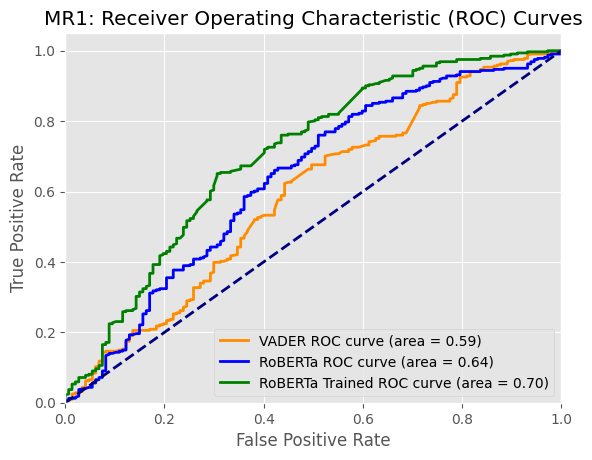

In [9]:
data['Manual Binary'] = data['Manual Rater 1'].map({'Positive': 1, 'Negative': 0})

clean_data = data.dropna(subset=['Manual Binary'])

true_labels_clean = clean_data['Manual Binary']
vader_scores_clean = clean_data['VADER Compound']
roberta_scores_clean = clean_data['RoBERTa Compound']
roberta_trained_scores_clean = clean_data['compound']

fpr_vader, tpr_vader, _ = roc_curve(true_labels_clean, vader_scores_clean)
roc_auc_vader = roc_auc_score(true_labels_clean, vader_scores_clean)

fpr_roberta, tpr_roberta, _ = roc_curve(true_labels_clean, roberta_scores_clean)
roc_auc_roberta = roc_auc_score(true_labels_clean, roberta_scores_clean)

fpr_roberta_trained, tpr_roberta_trained, _ = roc_curve(true_labels_clean, roberta_trained_scores_clean)
roc_auc_roberta_trained = roc_auc_score(true_labels_clean, roberta_trained_scores_clean)

plt.figure()
plt.plot(fpr_vader, tpr_vader, color='darkorange', lw=2, label=f'VADER ROC curve (area = {roc_auc_vader:.2f})')
plt.plot(fpr_roberta, tpr_roberta, color='blue', lw=2, label=f'RoBERTa ROC curve (area = {roc_auc_roberta:.2f})')
plt.plot(fpr_roberta_trained, tpr_roberta_trained, color='Green', lw=2, label=f'RoBERTa Trained ROC curve (area = {roc_auc_roberta_trained:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MR1: Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

# Metrics for Rater 2

In [12]:
sentiment_mapping = {
    'Positive': 1,
    'Negative': 0
}

clean_data = data.dropna(subset=['Manual Rater 2', 'GPT Sentiment', 'Gemini Sentiment', 'VADER Sentiment', 'RoBERTa Sentiment', 'Roberta Sentiment Trained'])

manual_numerical = clean_data['Manual Rater 2'].map(sentiment_mapping)
gpt_numerical = clean_data['GPT Sentiment'].map(sentiment_mapping)
gemini_numerical = clean_data['Gemini Sentiment'].map(sentiment_mapping)
vader_numerical = clean_data['VADER Sentiment'].map(sentiment_mapping)
roberta_numerical = clean_data['RoBERTa Sentiment'].map(sentiment_mapping)
roberta_trained_numerical = clean_data['Roberta Sentiment Trained'].map(sentiment_mapping)

manual_numerical.isna().sum(), gpt_numerical.isna().sum(), gemini_numerical.isna().sum(), vader_numerical.isna().sum(), roberta_numerical.isna().sum(), roberta_trained_numerical.isna().sum()

clean_indices = manual_numerical.dropna().index.intersection(
    gpt_numerical.dropna().index
).intersection(
    gemini_numerical.dropna().index
).intersection(
    vader_numerical.dropna().index
).intersection(
    roberta_numerical.dropna().index
).intersection(
    roberta_trained_numerical.dropna().index
)

manual_numerical_clean = manual_numerical.loc[clean_indices]
gpt_numerical_clean = gpt_numerical.loc[clean_indices]
gemini_numerical_clean = gemini_numerical.loc[clean_indices]
vader_numerical_clean = vader_numerical.loc[clean_indices]
roberta_numerical_clean = roberta_numerical.loc[clean_indices]
roberta_trained_numerical_clean = roberta_trained_numerical.loc[clean_indices]

def calculate_metrics(predictions, true_labels):
    accuracy = accuracy_score(true_labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predictions, average='weighted')
    conf_matrix = confusion_matrix(true_labels, predictions)
    
    return accuracy, precision, recall, f1, conf_matrix

gpt_metrics = calculate_metrics(gpt_numerical_clean, manual_numerical_clean)
gemini_metrics = calculate_metrics(gemini_numerical_clean, manual_numerical_clean)
vader_metrics = calculate_metrics(vader_numerical_clean, manual_numerical_clean)
roberta_metrics = calculate_metrics(roberta_numerical_clean, manual_numerical_clean)
roberta_trained_metrics = calculate_metrics(roberta_trained_numerical_clean, manual_numerical_clean)

metrics_df = pd.DataFrame({
    'Model': ['GPT', 'Gemini', 'VADER', 'RoBERTa', 'Roberta Trained'],
    'Accuracy': [gpt_metrics[0], gemini_metrics[0], vader_metrics[0], roberta_metrics[0], roberta_trained_metrics[0]],
    'Precision': [gpt_metrics[1], gemini_metrics[1], vader_metrics[1], roberta_metrics[1], roberta_trained_metrics[1]],
    'Recall': [gpt_metrics[2], gemini_metrics[2], vader_metrics[2], roberta_metrics[2], roberta_trained_metrics[2]],
    'F1-Score': [gpt_metrics[3], gemini_metrics[3], vader_metrics[3], roberta_metrics[3], roberta_trained_metrics[3]],
    'Confusion Matrix': [gpt_metrics[4], gemini_metrics[4], vader_metrics[4], roberta_metrics[4], roberta_trained_metrics[4]]
})

metrics_df


,Model,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
0,GPT,0.827869,0.850387,0.827869,0.808643,"[[56, 60], [3, 247]]"
1,Gemini,0.765027,0.768521,0.765027,0.766562,"[[76, 40], [46, 204]]"
2,VADER,0.661202,0.634617,0.661202,0.641466,"[[36, 80], [44, 206]]"
3,RoBERTa,0.691257,0.685098,0.691257,0.687756,"[[55, 61], [52, 198]]"
4,Roberta Trained,0.724044,0.731637,0.724044,0.727186,"[[71, 45], [56, 194]]"


### Confusion Matrix

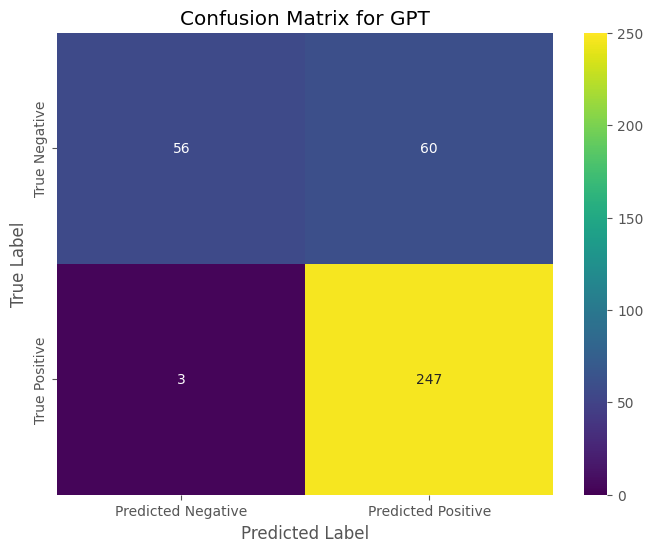

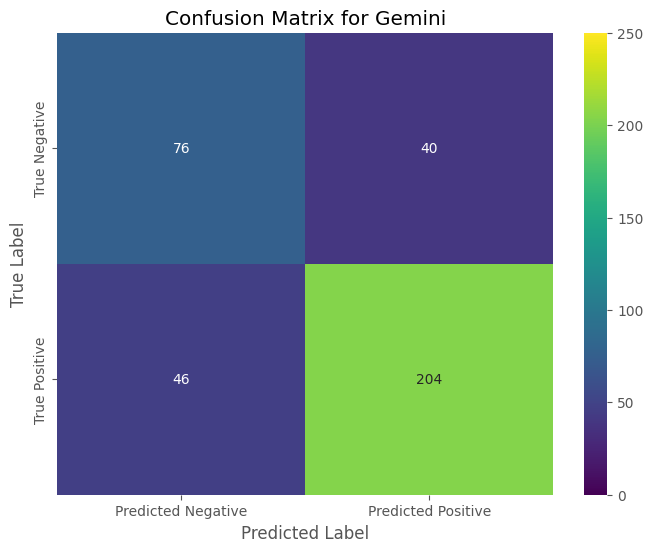

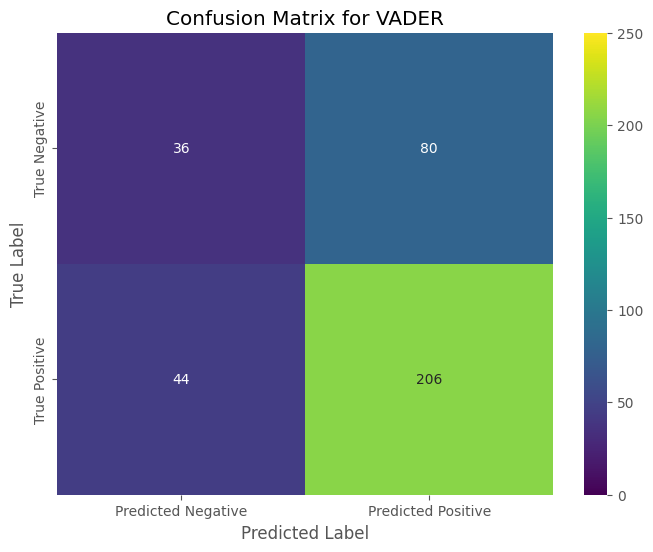

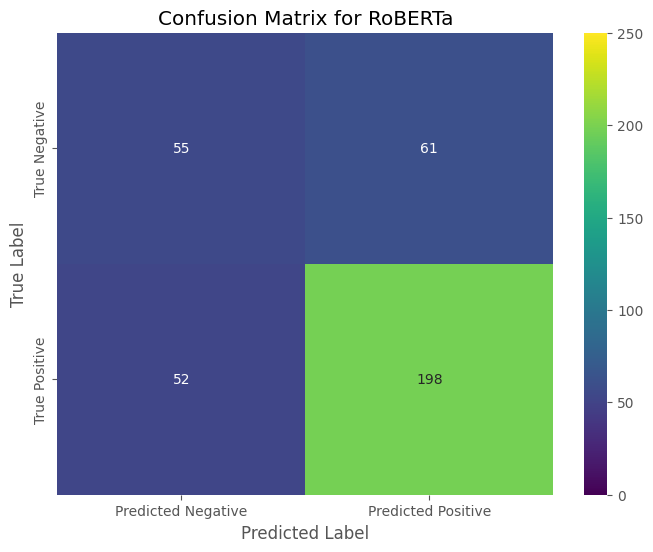

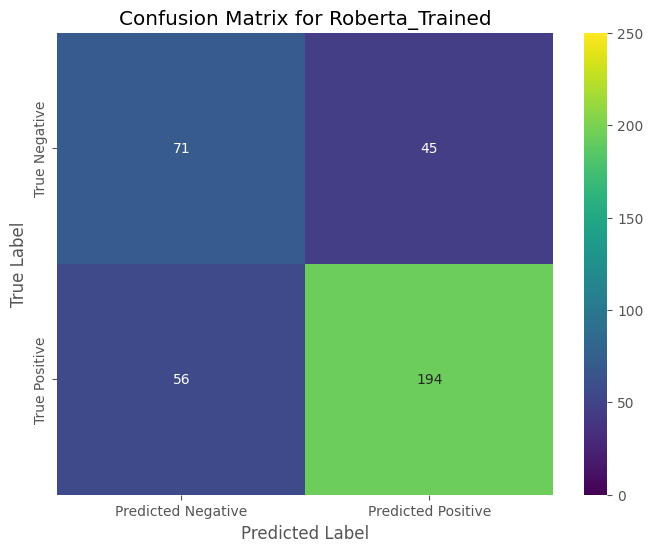

In [13]:
def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', vmin=0, vmax=250,
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['True Negative', 'True Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(gpt_metrics[4], 'GPT'),
plot_confusion_matrix(gemini_metrics[4], 'Gemini'),
plot_confusion_matrix(vader_metrics[4], 'VADER'),
plot_confusion_matrix(roberta_metrics[4], 'RoBERTa')
plot_confusion_matrix(roberta_trained_metrics[4], 'Roberta_Trained')

### Area Under Curve - Precision Recall Curve

In [81]:
gpt_auc_pr = average_precision_score(manual_numerical_clean, gpt_numerical_clean)
gemini_auc_pr = average_precision_score(manual_numerical_clean, gemini_numerical_clean)
vader_auc_pr = average_precision_score(manual_numerical_clean, vader_numerical_clean)
roberta_auc_pr = average_precision_score(manual_numerical_clean, roberta_numerical_clean)
roberta_trained_auc_pr = average_precision_score(manual_numerical_clean, roberta_trained_numerical_clean)
metrics_df = pd.DataFrame({
    'Model': ['GPT', 'Gemini', 'VADER', 'RoBERTa', 'Roberta Sentiment Trained'],
    'Accuracy': [gpt_metrics[0], gemini_metrics[0], vader_metrics[0], roberta_metrics[0], roberta_trained_metrics[0]],
    'Precision': [gpt_metrics[1], gemini_metrics[1], vader_metrics[1], roberta_metrics[1], roberta_trained_metrics[1]],
    'Recall': [gpt_metrics[2], gemini_metrics[2], vader_metrics[2], roberta_metrics[2], roberta_trained_metrics[2]],
    'F1-Score': [gpt_metrics[3], gemini_metrics[3], vader_metrics[3], roberta_metrics[3], roberta_trained_metrics[3]],
    'AUC-PR': [gpt_auc_pr, gemini_auc_pr, vader_auc_pr, roberta_auc_pr, roberta_trained_auc_pr]
})

metrics_df

,Model,Accuracy,Precision,Recall,F1-Score,AUC-PR
0,GPT,0.827869,0.850387,0.827869,0.808643,0.803102
1,Gemini,0.765027,0.768521,0.765027,0.766562,0.807913
2,VADER,0.661202,0.634617,0.661202,0.641466,0.713729
3,RoBERTa,0.691257,0.685098,0.691257,0.687756,0.747544
4,Roberta Sentiment Trained,0.724044,0.731637,0.724044,0.727186,0.782897


## Bar Chart depicting TP vs FP for each Model

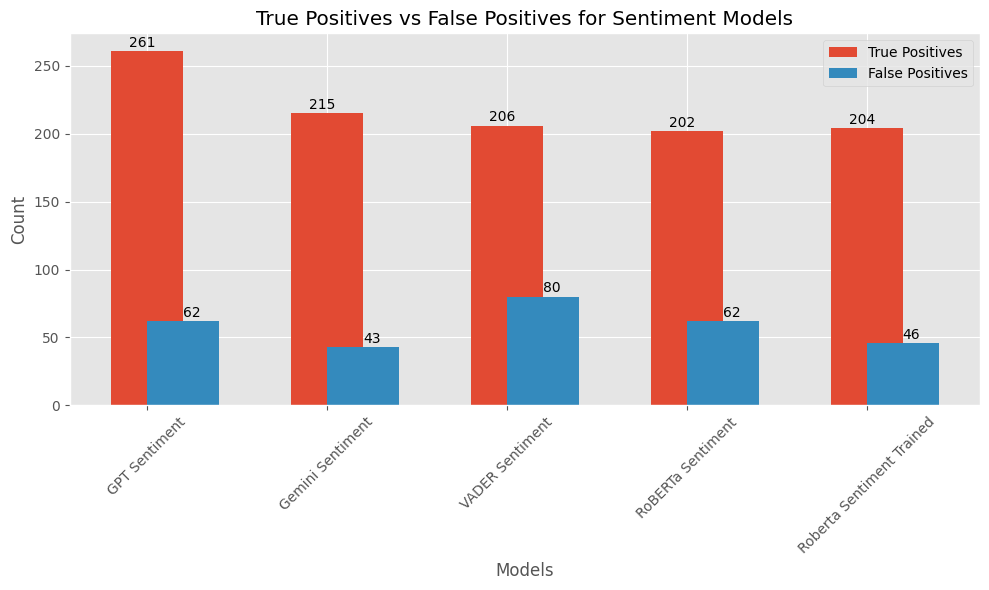

In [83]:
def calculate_true_false_positives(sentiment_col, manual_col):
    tp = ((data[sentiment_col] == 'Positive') & (data[manual_col] == 'Positive')).sum()
    fp = ((data[sentiment_col] == 'Positive') & (data[manual_col] != 'Positive')).sum()
    return tp, fp

models = ['GPT Sentiment', 'Gemini Sentiment', 'VADER Sentiment', 'RoBERTa Sentiment', 'Roberta Sentiment Trained']
manual_col = 'Manual Rater 2'

true_positives = []
false_positives = []

for model in models:
    tp, fp = calculate_true_false_positives(model, manual_col)
    true_positives.append(tp)
    false_positives.append(fp)

x = range(len(models))
plt.figure(figsize=(10, 6))
bars_tp = plt.bar(x, true_positives, width=0.4, label='True Positives', align='center')
bars_fp = plt.bar(x, false_positives, width=0.4, label='False Positives', align='edge')

for bar in bars_tp:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 1, int(yval), va='bottom')

for bar in bars_fp:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), va='bottom')

plt.xlabel('Models')
plt.ylabel('Count')
plt.title('True Positives vs False Positives for Sentiment Models')
plt.xticks(x, models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## ROC Curves

In [94]:
file_path = r"C:\Users\P-DTC1\Documents\Excel work\Models Sentiment and Compounds.csv"

data = pd.read_csv(file_path)

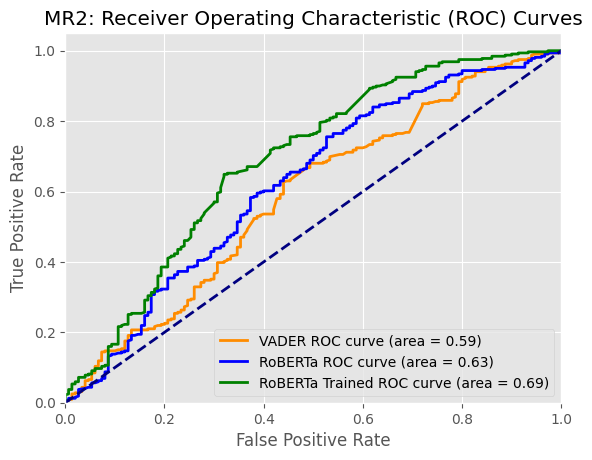

In [96]:
data['Manual Binary'] = data['Manual Rater 2'].map({'Positive': 1, 'Negative': 0})

clean_data = data.dropna(subset=['Manual Binary'])

true_labels_clean = clean_data['Manual Binary']
vader_scores_clean = clean_data['VADER Compound']
roberta_scores_clean = clean_data['RoBERTa Compound']
roberta_trained_scores_clean = clean_data['compound']

fpr_vader, tpr_vader, _ = roc_curve(true_labels_clean, vader_scores_clean)
roc_auc_vader = roc_auc_score(true_labels_clean, vader_scores_clean)

fpr_roberta, tpr_roberta, _ = roc_curve(true_labels_clean, roberta_scores_clean)
roc_auc_roberta = roc_auc_score(true_labels_clean, roberta_scores_clean)

fpr_roberta_trained, tpr_roberta_trained, _ = roc_curve(true_labels_clean, roberta_trained_scores_clean)
roc_auc_roberta_trained = roc_auc_score(true_labels_clean, roberta_trained_scores_clean)

plt.figure()
plt.plot(fpr_vader, tpr_vader, color='darkorange', lw=2, label=f'VADER ROC curve (area = {roc_auc_vader:.2f})')
plt.plot(fpr_roberta, tpr_roberta, color='blue', lw=2, label=f'RoBERTa ROC curve (area = {roc_auc_roberta:.2f})')
plt.plot(fpr_roberta_trained, tpr_roberta_trained, color='Green', lw=2, label=f'RoBERTa Trained ROC curve (area = {roc_auc_roberta_trained:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MR2: Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

# Model Comparison for Hospitality Data

# Metrics for Rater 1

In [100]:
file = r"C:\Users\P-DTC1\Documents\Excel work\Master Hospitality Results .csv"
data = pd.read_csv(file, encoding='latin1')
data

,ID,Review Title,Review Body,Review Rating,GPT Sentiment,Gemini Sentiment,Manual Rater 1,Manual Rater 2,VADER Compound,VADER Sentiment,VADER Star Rating,BERT sentiment,BERT Rating,RoBERTa Compound,RoBERTa Sentiment,RoBERTa Star Rating
0,1,review-01,The place is as described. Good value for money.,5,Positive,Postive,Positive,Positive,0.6486,Positive,5,Positive,4,0.8581,Positive,5
1,2,review-02,First comms contained everything needed. Great...,5,Positive,Postive,Positive,Positive,0.6249,Positive,5,Positive,5,0.9022,Positive,5
2,3,review-03,I actually did not stay because it did not wor...,5,Positive,Postive,Positive,Positive,0.9827,Positive,5,Neutral,3,0.7773,Positive,5
3,4,review-04,Great! Thank you very much!,5,Positive,Postive,Positive,Positive,0.8011,Positive,5,Positive,5,0.9888,Positive,5
4,5,review-05,I stayed here originally for 2 nights this wee...,5,Positive,Postive,Positive,Positive,0.8900,Positive,5,Positive,4,0.9707,Positive,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,review-196,Lucy's cottattage is the best air bnb I've eve...,5,Positive,Postive,Positive,Positive,0.9313,Positive,5,Positive,5,0.9886,Positive,5
196,197,review-197,Short but sweet stay :-)) Met Lucy when I chec...,5,Positive,Neutral,Positive,Neutral,0.9683,Positive,5,Positive,4,0.7680,Positive,5
197,198,review-198,We chose Lucy?s accommodation based on the pho...,5,Positive,Positive,Positive,Positive,0.9230,Positive,5,Positive,4,0.9742,Positive,5
198,199,review-199,A real home from home. Lucy makes sure of that...,5,Positive,Positive,Positive,Positive,0.9261,Positive,5,Positive,5,0.9789,Positive,5


In [101]:
sentiment_mapping = {
    'Positive': 1,
    'Negative': 0
}

clean_data = data.dropna(subset=['Manual Rater 1', 'GPT Sentiment', 'Gemini Sentiment', 'VADER Sentiment', 'RoBERTa Sentiment'])

manual_numerical = clean_data['Manual Rater 1'].map(sentiment_mapping)
gpt_numerical = clean_data['GPT Sentiment'].map(sentiment_mapping)
gemini_numerical = clean_data['Gemini Sentiment'].map(sentiment_mapping)
vader_numerical = clean_data['VADER Sentiment'].map(sentiment_mapping)
roberta_numerical = clean_data['RoBERTa Sentiment'].map(sentiment_mapping)

manual_numerical.isna().sum(), gpt_numerical.isna().sum(), gemini_numerical.isna().sum(), vader_numerical.isna().sum(), roberta_numerical.isna().sum()

clean_indices = manual_numerical.dropna().index.intersection(
    gpt_numerical.dropna().index
).intersection(
    gemini_numerical.dropna().index
).intersection(
    vader_numerical.dropna().index
).intersection(
    roberta_numerical.dropna().index
)

manual_numerical_clean = manual_numerical.loc[clean_indices]
gpt_numerical_clean = gpt_numerical.loc[clean_indices]
gemini_numerical_clean = gemini_numerical.loc[clean_indices]
vader_numerical_clean = vader_numerical.loc[clean_indices]
roberta_numerical_clean = roberta_numerical.loc[clean_indices]

def calculate_metrics(predictions, true_labels):
    accuracy = accuracy_score(true_labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predictions, average='weighted')
    conf_matrix = confusion_matrix(true_labels, predictions)
    
    return accuracy, precision, recall, f1, conf_matrix

gpt_metrics = calculate_metrics(gpt_numerical_clean, manual_numerical_clean)
gemini_metrics = calculate_metrics(gemini_numerical_clean, manual_numerical_clean)
vader_metrics = calculate_metrics(vader_numerical_clean, manual_numerical_clean)
roberta_metrics = calculate_metrics(roberta_numerical_clean, manual_numerical_clean)

metrics_df = pd.DataFrame({
    'Model': ['GPT', 'Gemini', 'VADER', 'RoBERTa'],
    'Accuracy': [gpt_metrics[0], gemini_metrics[0], vader_metrics[0], roberta_metrics[0]],
    'Precision': [gpt_metrics[1], gemini_metrics[1], vader_metrics[1], roberta_metrics[1]],
    'Recall': [gpt_metrics[2], gemini_metrics[2], vader_metrics[2], roberta_metrics[2]],
    'F1-Score': [gpt_metrics[3], gemini_metrics[3], vader_metrics[3], roberta_metrics[3]],
    'Confusion Matrix': [gpt_metrics[4], gemini_metrics[4], vader_metrics[4], roberta_metrics[4]]
})

metrics_df

,Model,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
0,GPT,0.97973,0.978982,0.97973,0.97917,"[[7, 2], [1, 138]]"
1,Gemini,1.00000,1.000000,1.00000,1.00000,"[[9, 0], [0, 139]]"
2,VADER,0.97973,0.978982,0.97973,0.97917,"[[7, 2], [1, 138]]"
3,RoBERTa,1.00000,1.000000,1.00000,1.00000,"[[9, 0], [0, 139]]"


## Confusion Matrix

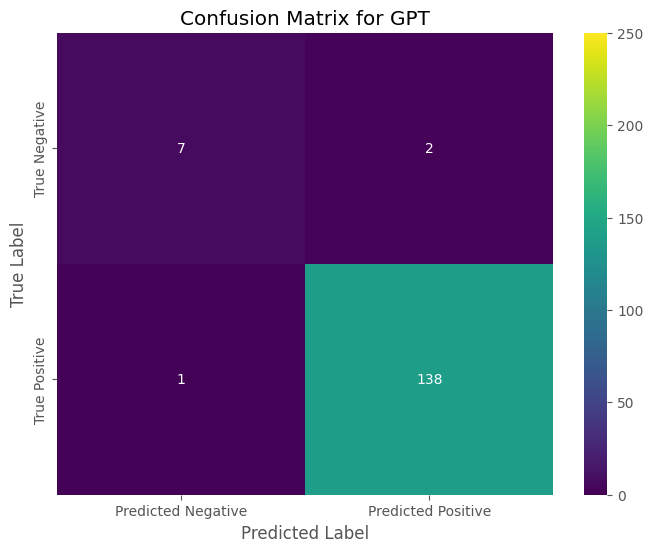

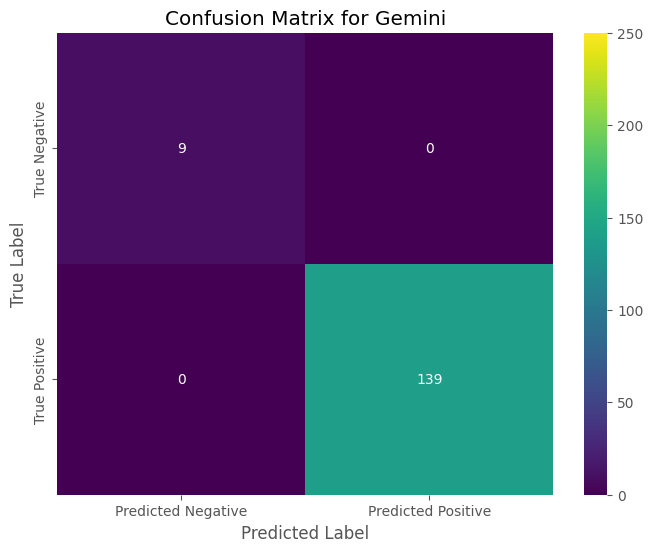

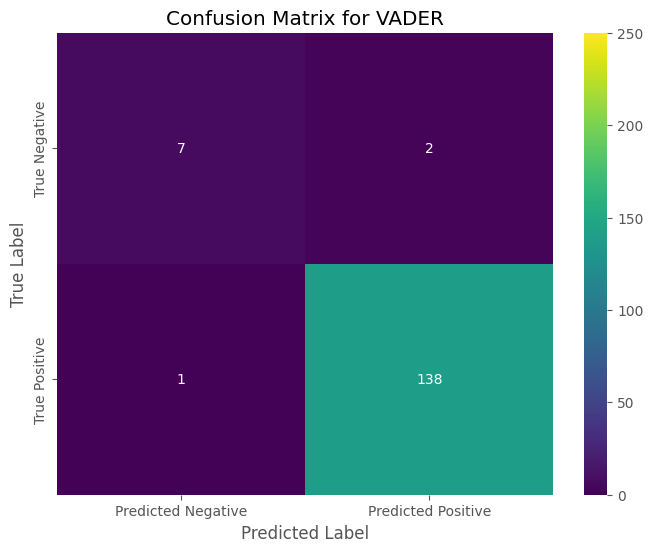

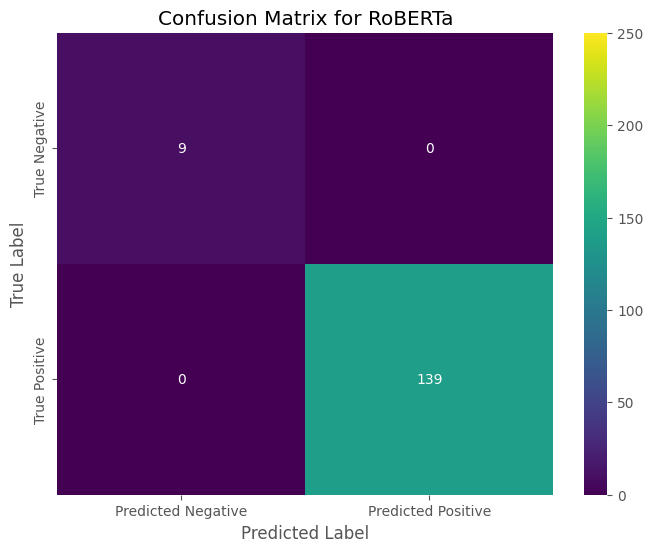

In [102]:
def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', vmin=0, vmax=250,
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['True Negative', 'True Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(gpt_metrics[4], 'GPT'),
plot_confusion_matrix(gemini_metrics[4], 'Gemini'),
plot_confusion_matrix(vader_metrics[4], 'VADER'),
plot_confusion_matrix(roberta_metrics[4], 'RoBERTa')

## AUC

In [103]:
gpt_auc_pr = average_precision_score(manual_numerical_clean, gpt_numerical_clean)
gemini_auc_pr = average_precision_score(manual_numerical_clean, gemini_numerical_clean)
vader_auc_pr = average_precision_score(manual_numerical_clean, vader_numerical_clean)
roberta_auc_pr = average_precision_score(manual_numerical_clean, roberta_numerical_clean)
metrics_df = pd.DataFrame({
    'Model': ['GPT', 'Gemini', 'VADER', 'RoBERTa'],
    'Accuracy': [gpt_metrics[0], gemini_metrics[0], vader_metrics[0], roberta_metrics[0]],
    'Precision': [gpt_metrics[1], gemini_metrics[1], vader_metrics[1], roberta_metrics[1]],
    'Recall': [gpt_metrics[2], gemini_metrics[2], vader_metrics[2], roberta_metrics[2]],
    'F1-Score': [gpt_metrics[3], gemini_metrics[3], vader_metrics[3], roberta_metrics[3]],
    'AUC-PR': [gpt_auc_pr, gemini_auc_pr, vader_auc_pr, roberta_auc_pr]
})

metrics_df

,Model,Accuracy,Precision,Recall,F1-Score,AUC-PR
0,GPT,0.97973,0.978982,0.97973,0.97917,0.98538
1,Gemini,1.00000,1.000000,1.00000,1.00000,1.00000
2,VADER,0.97973,0.978982,0.97973,0.97917,0.98538
3,RoBERTa,1.00000,1.000000,1.00000,1.00000,1.00000


## Bar Chart depicting TP vs FP for each Model

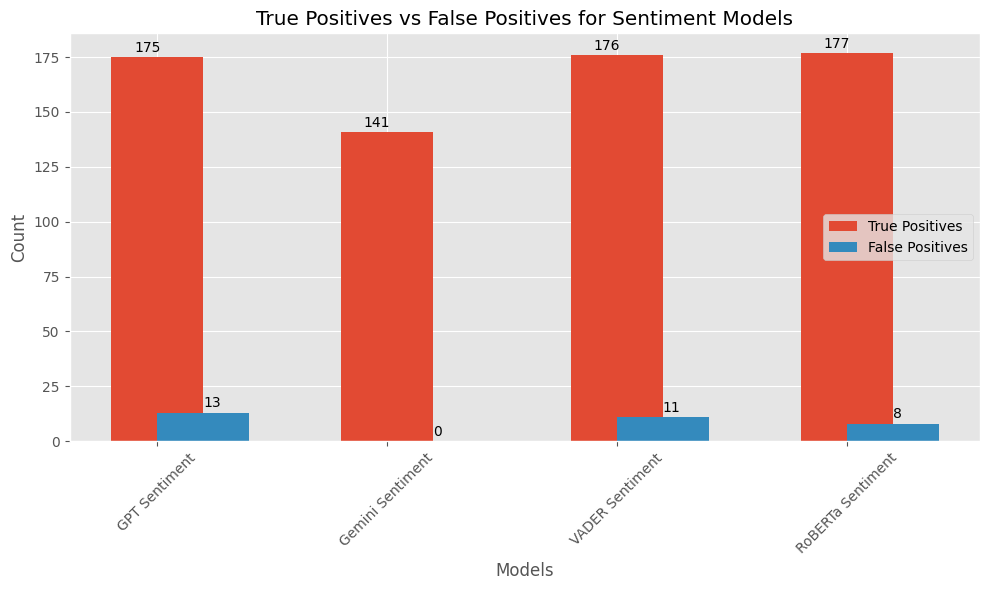

In [104]:
def calculate_true_false_positives(sentiment_col, manual_col):
    tp = ((data[sentiment_col] == 'Positive') & (data[manual_col] == 'Positive')).sum()
    fp = ((data[sentiment_col] == 'Positive') & (data[manual_col] != 'Positive')).sum()
    return tp, fp

models = ['GPT Sentiment', 'Gemini Sentiment', 'VADER Sentiment', 'RoBERTa Sentiment']
manual_col = 'Manual Rater 1'

true_positives = []
false_positives = []

for model in models:
    tp, fp = calculate_true_false_positives(model, manual_col)
    true_positives.append(tp)
    false_positives.append(fp)

x = range(len(models))
plt.figure(figsize=(10, 6))
bars_tp = plt.bar(x, true_positives, width=0.4, label='True Positives', align='center')
bars_fp = plt.bar(x, false_positives, width=0.4, label='False Positives', align='edge')

for bar in bars_tp:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 1, int(yval), va='bottom')

for bar in bars_fp:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), va='bottom')

plt.xlabel('Models')
plt.ylabel('Count')
plt.title('True Positives vs False Positives for Sentiment Models')
plt.xticks(x, models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## ROC Curves

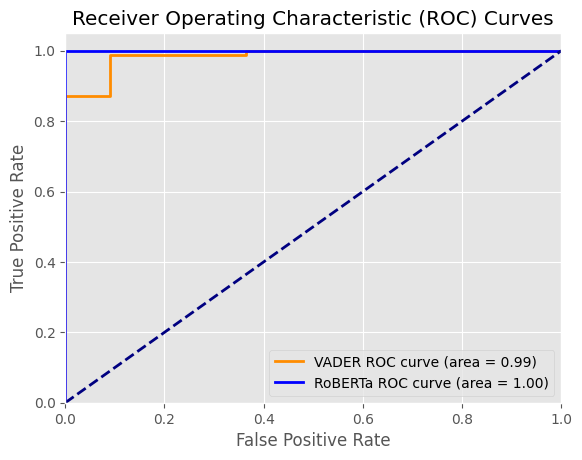

In [105]:
data['Manual Binary'] = data['Manual Rater 1'].map({'Positive': 1, 'Negative': 0})

clean_data = data.dropna(subset=['Manual Binary'])

true_labels_clean = clean_data['Manual Binary']
vader_scores_clean = clean_data['VADER Compound']
roberta_scores_clean = clean_data['RoBERTa Compound']

fpr_vader, tpr_vader, _ = roc_curve(true_labels_clean, vader_scores_clean)
roc_auc_vader = roc_auc_score(true_labels_clean, vader_scores_clean)

fpr_roberta, tpr_roberta, _ = roc_curve(true_labels_clean, roberta_scores_clean)
roc_auc_roberta = roc_auc_score(true_labels_clean, roberta_scores_clean)

plt.figure()
plt.plot(fpr_vader, tpr_vader, color='darkorange', lw=2, label=f'VADER ROC curve (area = {roc_auc_vader:.2f})')
plt.plot(fpr_roberta, tpr_roberta, color='blue', lw=2, label=f'RoBERTa ROC curve (area = {roc_auc_roberta:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

# Metrics for Rater 2

In [106]:
sentiment_mapping = {
    'Positive': 1,
    'Negative': 0
}

clean_data = data.dropna(subset=['Manual Rater 2', 'GPT Sentiment', 'Gemini Sentiment', 'VADER Sentiment', 'RoBERTa Sentiment'])

manual_numerical = clean_data['Manual Rater 2'].map(sentiment_mapping)
gpt_numerical = clean_data['GPT Sentiment'].map(sentiment_mapping)
gemini_numerical = clean_data['Gemini Sentiment'].map(sentiment_mapping)
vader_numerical = clean_data['VADER Sentiment'].map(sentiment_mapping)
roberta_numerical = clean_data['RoBERTa Sentiment'].map(sentiment_mapping)

manual_numerical.isna().sum(), gpt_numerical.isna().sum(), gemini_numerical.isna().sum(), vader_numerical.isna().sum(), roberta_numerical.isna().sum()

clean_indices = manual_numerical.dropna().index.intersection(
    gpt_numerical.dropna().index
).intersection(
    gemini_numerical.dropna().index
).intersection(
    vader_numerical.dropna().index
).intersection(
    roberta_numerical.dropna().index
)

manual_numerical_clean = manual_numerical.loc[clean_indices]
gpt_numerical_clean = gpt_numerical.loc[clean_indices]
gemini_numerical_clean = gemini_numerical.loc[clean_indices]
vader_numerical_clean = vader_numerical.loc[clean_indices]
roberta_numerical_clean = roberta_numerical.loc[clean_indices]

def calculate_metrics(predictions, true_labels):
    accuracy = accuracy_score(true_labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predictions, average='weighted')
    conf_matrix = confusion_matrix(true_labels, predictions)
    
    return accuracy, precision, recall, f1, conf_matrix

gpt_metrics = calculate_metrics(gpt_numerical_clean, manual_numerical_clean)
gemini_metrics = calculate_metrics(gemini_numerical_clean, manual_numerical_clean)
vader_metrics = calculate_metrics(vader_numerical_clean, manual_numerical_clean)
roberta_metrics = calculate_metrics(roberta_numerical_clean, manual_numerical_clean)

metrics_df = pd.DataFrame({
    'Model': ['GPT', 'Gemini', 'VADER', 'RoBERTa'],
    'Accuracy': [gpt_metrics[0], gemini_metrics[0], vader_metrics[0], roberta_metrics[0]],
    'Precision': [gpt_metrics[1], gemini_metrics[1], vader_metrics[1], roberta_metrics[1]],
    'Recall': [gpt_metrics[2], gemini_metrics[2], vader_metrics[2], roberta_metrics[2]],
    'F1-Score': [gpt_metrics[3], gemini_metrics[3], vader_metrics[3], roberta_metrics[3]],
    'Confusion Matrix': [gpt_metrics[4], gemini_metrics[4], vader_metrics[4], roberta_metrics[4]]
})

metrics_df

,Model,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
0,GPT,0.97973,0.978982,0.97973,0.97917,"[[7, 2], [1, 138]]"
1,Gemini,1.00000,1.000000,1.00000,1.00000,"[[9, 0], [0, 139]]"
2,VADER,0.97973,0.978982,0.97973,0.97917,"[[7, 2], [1, 138]]"
3,RoBERTa,1.00000,1.000000,1.00000,1.00000,"[[9, 0], [0, 139]]"


## Confusion Matrix

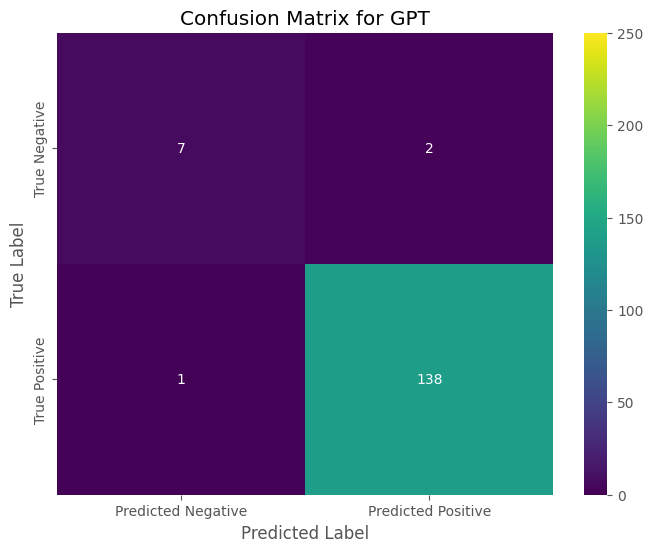

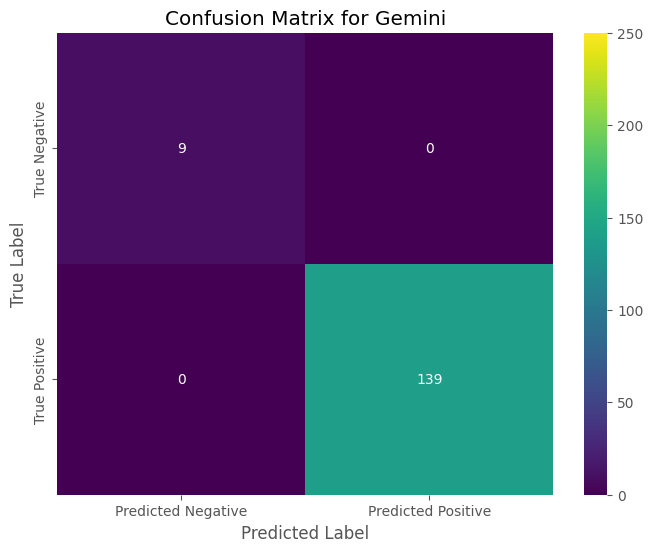

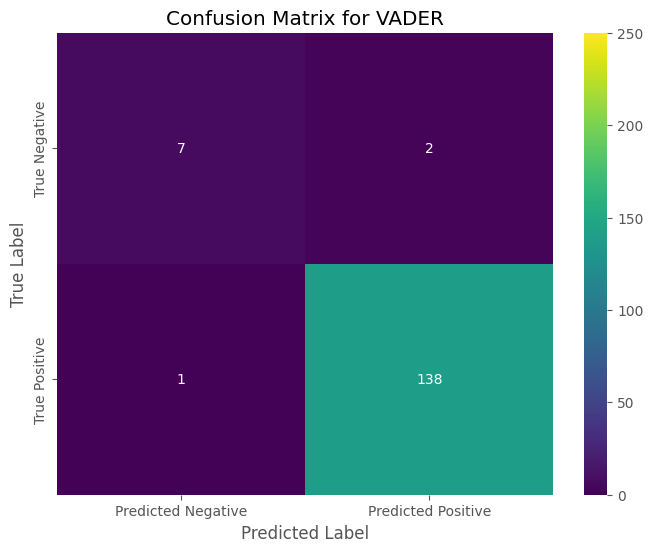

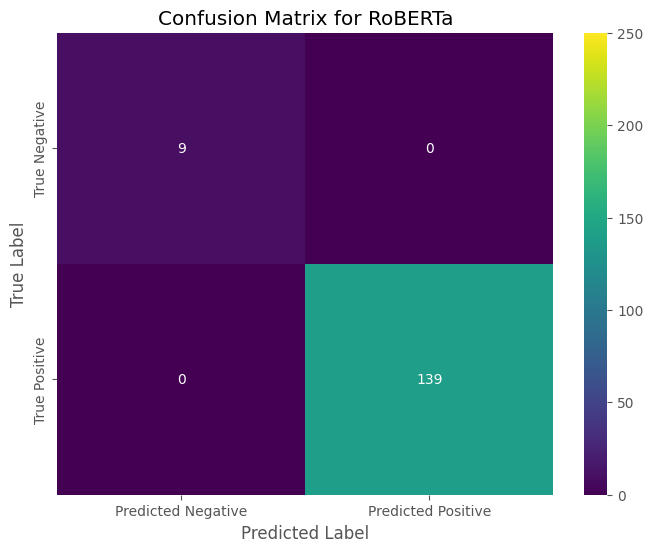

In [107]:
def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', vmin=0, vmax=250,
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['True Negative', 'True Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(gpt_metrics[4], 'GPT'),
plot_confusion_matrix(gemini_metrics[4], 'Gemini'),
plot_confusion_matrix(vader_metrics[4], 'VADER'),
plot_confusion_matrix(roberta_metrics[4], 'RoBERTa')

## AUC

In [108]:
gpt_auc_pr = average_precision_score(manual_numerical_clean, gpt_numerical_clean)
gemini_auc_pr = average_precision_score(manual_numerical_clean, gemini_numerical_clean)
vader_auc_pr = average_precision_score(manual_numerical_clean, vader_numerical_clean)
roberta_auc_pr = average_precision_score(manual_numerical_clean, roberta_numerical_clean)

metrics_df = pd.DataFrame({
    'Model': ['GPT', 'Gemini', 'VADER', 'RoBERTa'],
    'Accuracy': [gpt_metrics[0], gemini_metrics[0], vader_metrics[0], roberta_metrics[0]],
    'Precision': [gpt_metrics[1], gemini_metrics[1], vader_metrics[1], roberta_metrics[1]],
    'Recall': [gpt_metrics[2], gemini_metrics[2], vader_metrics[2], roberta_metrics[2]],
    'F1-Score': [gpt_metrics[3], gemini_metrics[3], vader_metrics[3], roberta_metrics[3]],
    'AUC-PR': [gpt_auc_pr, gemini_auc_pr, vader_auc_pr, roberta_auc_pr]
})

metrics_df

,Model,Accuracy,Precision,Recall,F1-Score,AUC-PR
0,GPT,0.97973,0.978982,0.97973,0.97917,0.98538
1,Gemini,1.00000,1.000000,1.00000,1.00000,1.00000
2,VADER,0.97973,0.978982,0.97973,0.97917,0.98538
3,RoBERTa,1.00000,1.000000,1.00000,1.00000,1.00000


## Bar Chart depicting TP vs FP for each Model

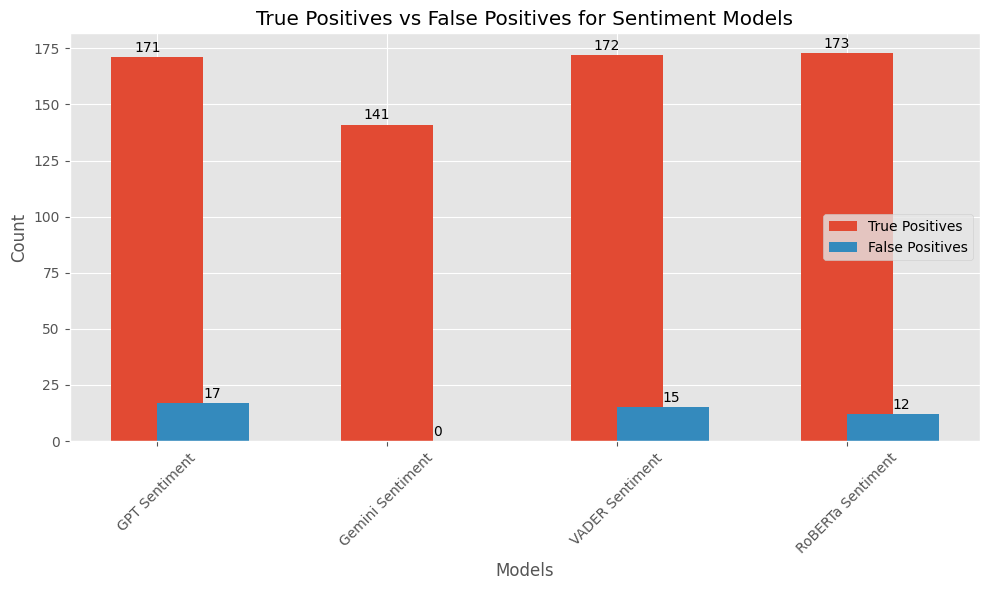

In [109]:
def calculate_true_false_positives(sentiment_col, manual_col):
    tp = ((data[sentiment_col] == 'Positive') & (data[manual_col] == 'Positive')).sum()
    fp = ((data[sentiment_col] == 'Positive') & (data[manual_col] != 'Positive')).sum()
    return tp, fp

models = ['GPT Sentiment', 'Gemini Sentiment', 'VADER Sentiment', 'RoBERTa Sentiment']
manual_col = 'Manual Rater 2'

true_positives = []
false_positives = []

for model in models:
    tp, fp = calculate_true_false_positives(model, manual_col)
    true_positives.append(tp)
    false_positives.append(fp)

x = range(len(models))
plt.figure(figsize=(10, 6))
bars_tp = plt.bar(x, true_positives, width=0.4, label='True Positives', align='center')
bars_fp = plt.bar(x, false_positives, width=0.4, label='False Positives', align='edge')

for bar in bars_tp:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 1, int(yval), va='bottom')

for bar in bars_fp:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), va='bottom')

plt.xlabel('Models')
plt.ylabel('Count')
plt.title('True Positives vs False Positives for Sentiment Models')
plt.xticks(x, models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## ROC Curves

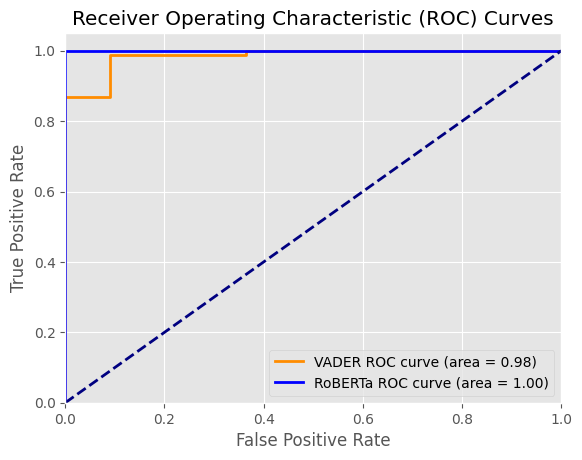

In [224]:
data['Manual Binary'] = data['Manual Rater 2'].map({'Positive': 1, 'Negative': 0})

clean_data = data.dropna(subset=['Manual Binary'])

true_labels_clean = clean_data['Manual Binary']
vader_scores_clean = clean_data['VADER Compound']
roberta_scores_clean = clean_data['RoBERTa Compound']

fpr_vader, tpr_vader, _ = roc_curve(true_labels_clean, vader_scores_clean)
roc_auc_vader = roc_auc_score(true_labels_clean, vader_scores_clean)

fpr_roberta, tpr_roberta, _ = roc_curve(true_labels_clean, roberta_scores_clean)
roc_auc_roberta = roc_auc_score(true_labels_clean, roberta_scores_clean)

plt.figure()
plt.plot(fpr_vader, tpr_vader, color='darkorange', lw=2, label=f'VADER ROC curve (area = {roc_auc_vader:.2f})')
plt.plot(fpr_roberta, tpr_roberta, color='blue', lw=2, label=f'RoBERTa ROC curve (area = {roc_auc_roberta:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

# *END OF ANALYSIS*